In [1]:
import seaborn as sns
sns.set_style("white")


In [2]:
old_map={}
for x in open("/Users/dlivitz/Documents/Project-OFIR/IBM_F2F_Apr_2018/clone_annots_v3"):
    i=x.strip("\n").split("\t")[0]
    c=x.strip("\r\n").split("\t")[1]
    if i not in old_map:old_map[i]={}
    old_map[i][c]=set([y.partition(" ")[0] for y in x.strip("\n").split("\t")[3:]])

#old_map={x.strip("\n").split("\t")[0]+"_"+x.strip("\r\n").split("\t")[1]:set([y.partition(" ")[0] for y in x.strip("\n").split("\t")[3:]]) for x in open("/Users/dlivitz/Documents/Project-CLL_Michi/Clone_annotation.tsv").readlines()}

In [77]:
old_map

{'1': {'1': {'',
   '-14q32',
   '-18q23',
   'ABCG2',
   'KCNMA1',
   'KIAA0825',
   'LATS1',
   'PTPRO',
   'SF3B1',
   'TBX5',
   'WEE1'},
  '2': {'', '+8q24', '-11q23', 'MGRN1', 'YBX3'},
  '3': {'', '+13q14', 'TP53', 'USP4'},
  '4': {'',
   '19q',
   'FAM50A',
   'GPD1',
   'IFT81',
   'KIF20B',
   'MED16',
   'SLIT3',
   'TMCO3',
   'WNT7B'},
  '5': {'',
   '+5q34',
   '-17p13',
   '-9q33',
   'GPR98',
   'GRIK2',
   'IQUB',
   'NEB',
   'PLS1',
   'PRAMEF1',
   'RNF17',
   'TJP3'},
  '6': {'', 'C7orf57', 'IBSP'}},
 '10': {'1': {'',
   '-13q14',
   'AC096579.13',
   'CDH23',
   'CEP350',
   'CNTRL',
   'DNAH3',
   'DYNC2H1',
   'IGHV3-23',
   'IGKV4-1',
   'MMP13',
   'OLFM1',
   'PLEKHH1',
   'RP11-446E24.4',
   'SHISA2',
   'TCF20',
   'TNIK',
   'ZNF192P1'},
  '2': {'', 'AC096579.13', 'ATRN', 'C6orf120'},
  '3': {'',
   'ERO1LB',
   'GPR116',
   'OR6Q1',
   'RASGRF2',
   'RIMBP2',
   'SLC27A3',
   'WWC1'},
  '4': {'', 'AOAH', 'CSGALNACT1', 'CYP2D6', 'LILRA2', 'TTN'}},
 '11': {'

In [3]:
old_gr={}
old_tree={}
pt=None
with open("/Users/dlivitz/Documents/Project-CLL_Michi/michi_growthrate_published.dat") as old_data_in:
    old_data_in.readline()
    pt=0
    for line in old_data_in:
        spl=line.strip("\n").split("\t")
        if "Pt" in spl[0]:pt=spl[0].split(".")[-1] 
        try:
            v=float(spl[3])
            #if pt not in old_gr:old_gr[pt]={}
            old_gr[pt+"_"+spl[1]]=v
        except:
            pass
        if pt not in old_tree:old_tree[pt]=[]
        old_tree[pt].append((eval(spl[2]),eval(spl[1])))
    

In [79]:
!cat /Users/dlivitz/Documents/Project-CLL_Michi/michi_growthrate_published.dat

﻿
Pt.1	0	None	
	1	0	0.734
	2	1	0.119
	3	0	0.523
	4	3	0
	5	4	0.633
Pt.2	0	None	
	1	0	0.874
Pt.3	0	None	
	1	0	0.041
	2	1	0.152
Pt.5	0	None	
	1	0	0.973
	2	0	0.772
	3	1	0
	4	2	0
	5	2	0
Pt.6	0	None	
	1	0	0.785
	2	0	0.758
	4	1	0.014
Pt.7	0	None	
	1	0	0
	2	1	0.993
	3	2	0.006
Pt.8	0	None	
	1	0	0.084
	2	0	0.427
Pt.9	0	None	
	1	0	0.001
	2	0	1
	3	1	0.701
	4	2	0.045
Pt.10	0	None	
	1	0	0.293
	2	1	0.868
Pt.12	0	None	
	1	0	0.471
	2	1	0.075
Pt.13	0	None	
	1	0	0.612
	2	1	0.025
	3	1	0.629
	5	2	0.814
Pt.14	0	None	
	1	0	0
Pt.17	0	None	
	1	0	0.846
	3	1	0.929
Pt.20	0	None	
	1	0	0.479
Pt.21	0	None	
	1	0	0.115


In [4]:
import re
nan=np.nan

NameError: name 'np' is not defined

```python
D={}
out_tsv=open("CLL-Kipps-p_vals_Mar28_2018_f.tsv","w")
out_tsv.write("indiv\tclust\told_gr\tGR_gr_Parent\tp_not_exp\n")
for pkl_fn in glob.glob("/Users/dlivitz/ipythonNB/CLL-CRC-*.5.pkl"):
    clusters={}
    indiv=pkl_fn.split(".")[0].split("/")[-1]
    new_membership={}
    if "WGS" in pkl_fn:
        with open("/Users/dlivitz/Documents/Project-CLL_Michi/nd_res_v3/january_freeze_-9_2018_"+indiv+".WGS.cluster.maf") as maf:
            maf.readline()
            for line in maf:
                spl=line.strip("\n").split("\t")
                if spl[14] not in clusters:clusters[spl[14]]=set()
                clusters[spl[14]].add(spl[0])

    else:
        with open("/Users/dlivitz/Documents/Project-CLL_Michi/nd_res_v3/january_freeze_-9_2018_"+indiv+".cluster.maf") as maf:
            maf.readline()
            for line in maf:
                spl=line.strip("\n").split("\t")
                if spl[14] not in clusters:clusters[spl[14]]=set()
                clusters[spl[14]].add(spl[0])
                
    #
    print pkl_fn.split(".pkl")[0] + "\t" +"GR > Parent pval" 

    plt.figure()
    overlap_map=np.zeros([len(clusters),len(old_map[str(int(indiv.split("-")[2]))].items())])
    overlap_map_len=np.zeros([len(clusters),len(old_map[str(int(indiv.split("-")[2]))].items())])
    for c_idx,cluster in clusters.items():
        for o_c_idx,o_cluster in old_map[str(int(indiv.split("-")[2]))].items():
            try:
                overlap_map[int(c_idx)-1,int(o_c_idx)-1]=len(cluster.intersection(o_cluster))/float(len(cluster))
                overlap_map_len[int(c_idx)-1,int(o_c_idx)-1]=len(cluster.intersection(o_cluster))

            except:
                continue
    #sns.heatmap(overlap_map,annot=overlap_map_len)
    if "WGS" in pkl_fn: 
        d={"A":"A"}
    else:
        d={str(i_row):str(np.argmax(row)) for i_row,row in enumerate(overlap_map)}
    pattern = re.compile('|'.join(d.keys()))
    
    
    if "WGS" in pkl_fn: continue
    for new,old in d.items():
        out_tsv.write(indiv+"\t"+old+"\t"+new+"\n")
    D[indiv]=d
    continue

    
    plt.xlabel("old_id")
    plt.ylabel("new_id")
    plt.show()
    with open(pkl_fn) as pkl:
        c_log,trees_by_edge,cluster_rates,cluster_rates_diff,cluster_line_fit_min_lik= cPickle.load(pkl)
    print pkl_fn.split(".pkl")[0] + "\t" +"GR > Parent pval" 
    clusters={}

    for cluster_idx,cluster in cluster_rates_diff.items():
        clusters[int(d.get(str(cluster_idx),str(cluster_idx)))]=[np.nansum(np.array(cluster)[5000:]<0)/len(np.array(cluster)[5000:])]
        #print str(cluster_idx)+"\t%1.3f" % (np.nansum(np.array(cluster)[5000:]<0)/len(np.array(cluster)[5000:])) 
    #print pkl_fn.split(".pkl")[0] + "\t" +"log/exp pval" 
    for cluster_idx,cluster in cluster_line_fit_min_lik.items():
        #print str(cluster_idx)+"\t%1.3f" % (np.nansum(np.array(cluster)[5000:]>0.05)/len(np.array(cluster)[5000:])) 
        clusters[int(d.get(str(cluster_idx),str(cluster_idx)))].append(np.nansum(np.array(cluster)[5000:]>0.05)/len(np.array(cluster)[5000:]))

    for cluster,values in clusters.items():
        out_tsv.write("\t".join([indiv,str(cluster),str(old_gr.get(str(int(indiv.split("-")[2]))+"_"+str(cluster))),str(values[0]),str(values[1])])+"\n")
    continue
    for tree,dist in sorted(trees_by_edge.items(),key=lambda x:-len(x[1])):

        if len(dist) < 1000:continue
        plt.figure(figsize=(12,4))

        plt.subplot(1,3,1)
        plot_nx([[None,0]]+list(eval(pattern.sub(lambda x: d[x.group()], str(list(tree))))),"dot")
        plt.title(indiv+"_old_c")
        plt.subplot(1,3,2)
        plot_nx([[None,0]]+list(tree),"dot")
        plt.title(indiv+"_new_c")
        plt.subplot(1,3,3)
        sns.distplot(dist[100:],label=str(np.nanmean(dist[100:])))
        plt.legend()
        plt.title(len(dist))
        
        
        plt.show()
        
out_tsv.close()
gc.collect()
```

In [9]:
R=cPickle.load(open("/Users/dlivitz/ipythonNB/Kipps.F.pkl","rb"))

In [8]:
gc.enable()

NameError: name 'gc' is not defined

In [10]:
def sum2(x):
    return sum(x)

In [11]:
import matplotlib.pyplot as plt

Pt.1


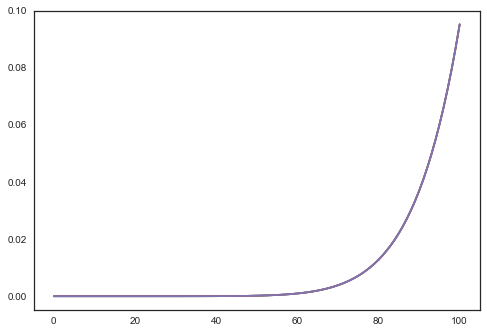

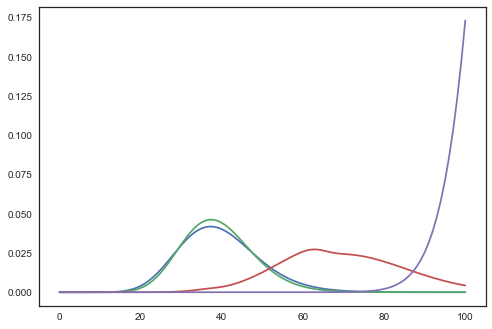

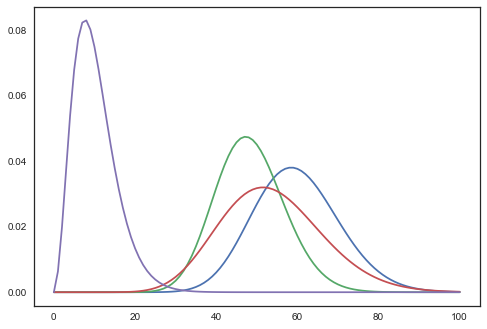

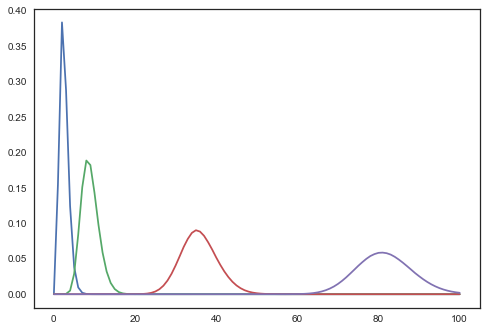

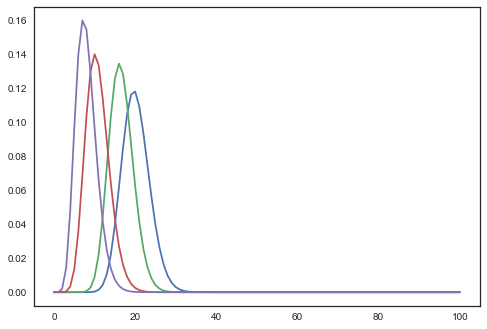

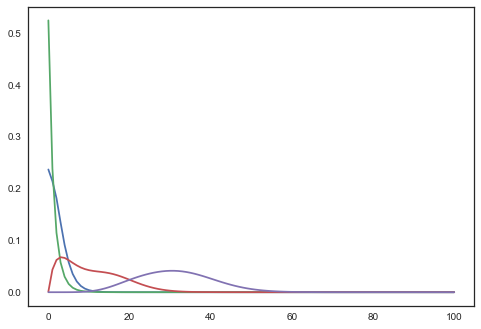

Pt.2


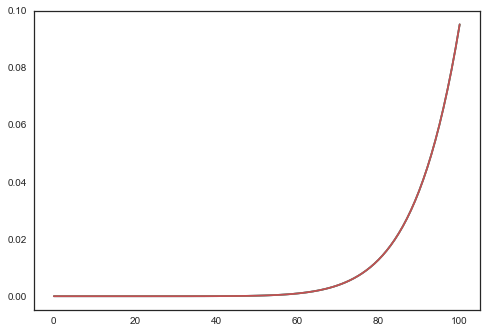

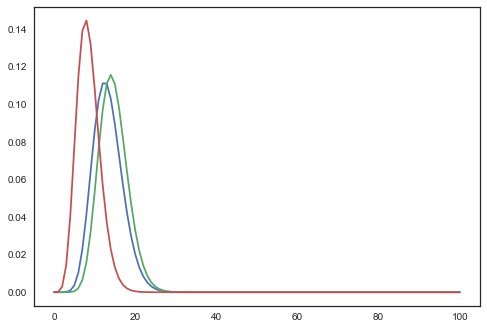

Pt.3


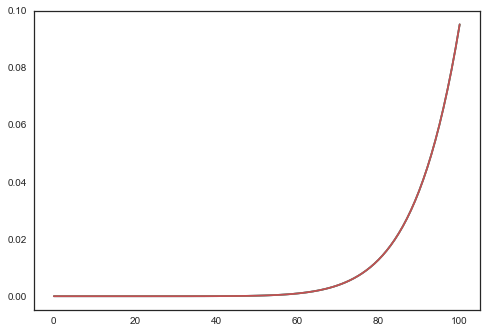

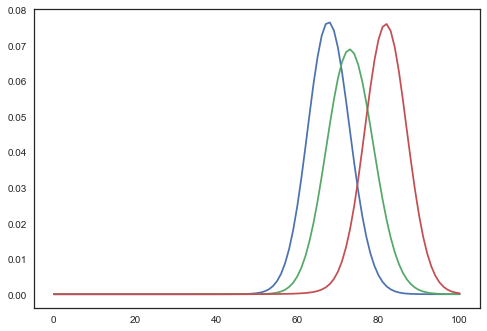

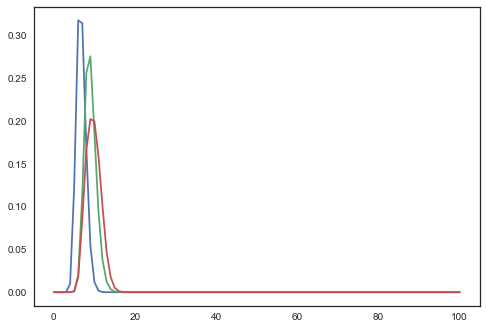

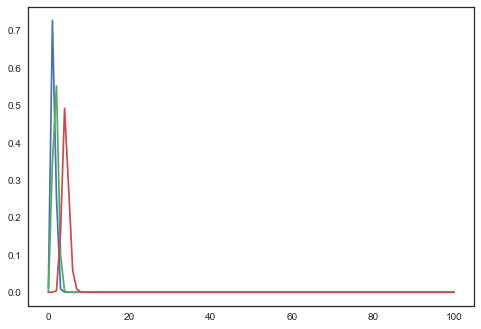

Pt.4


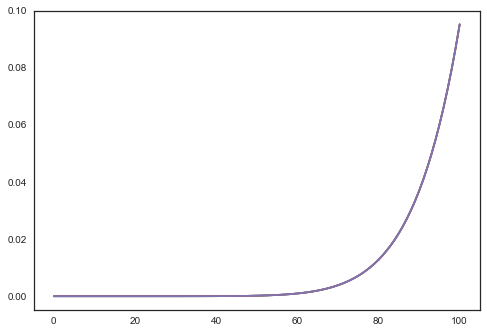

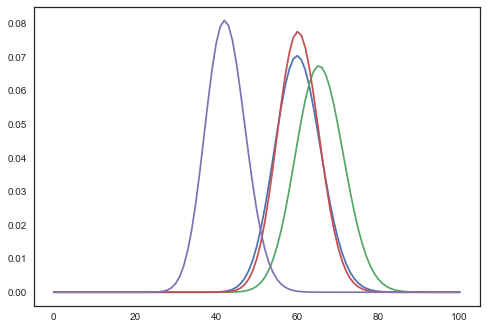

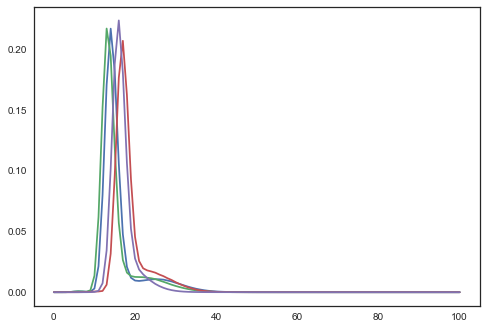

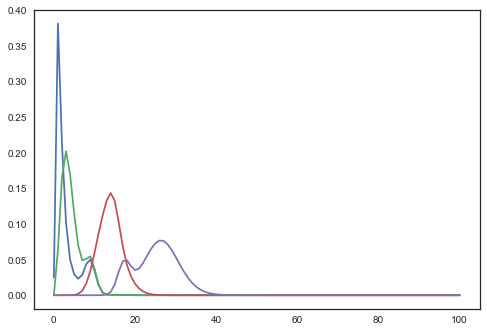

Pt.5


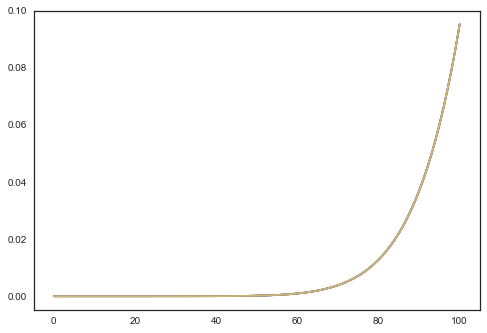

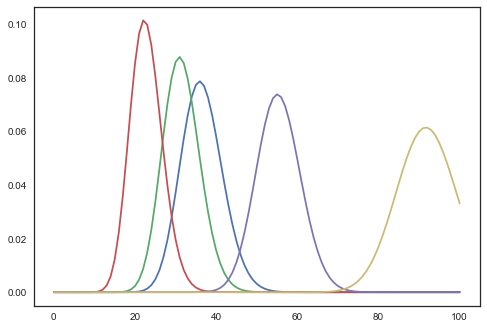

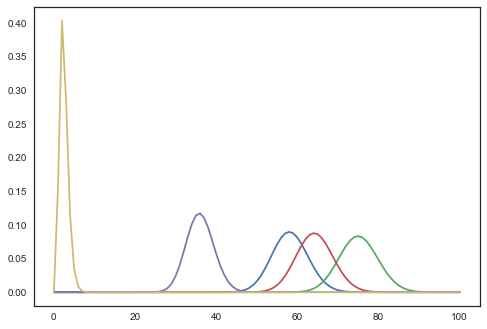

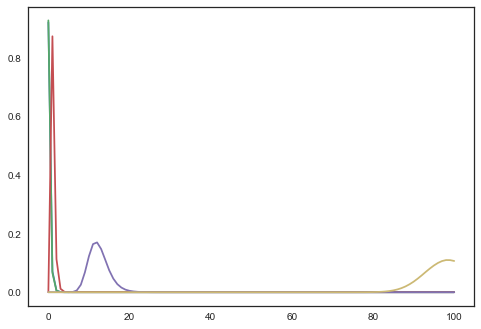

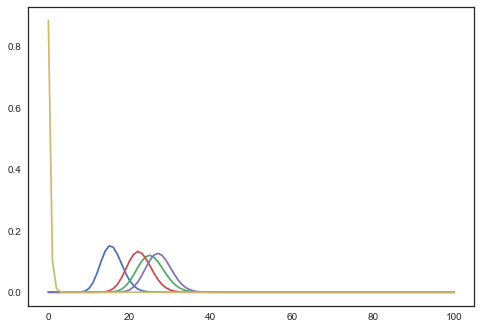

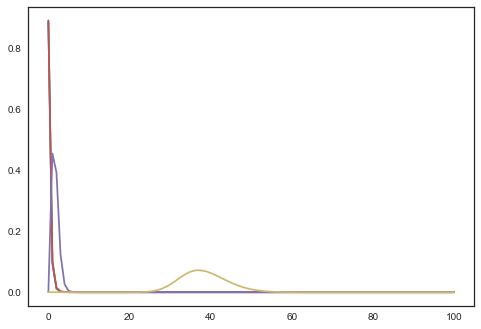

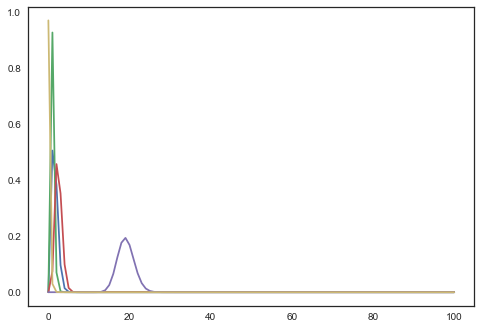

Pt.6


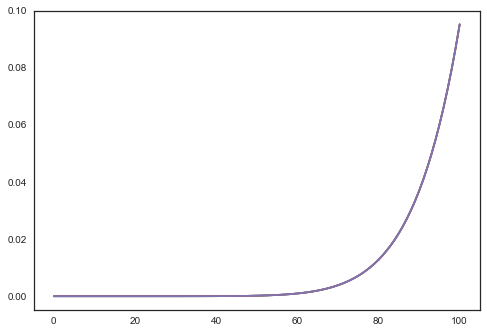

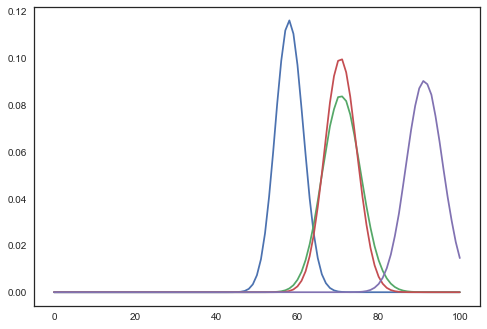

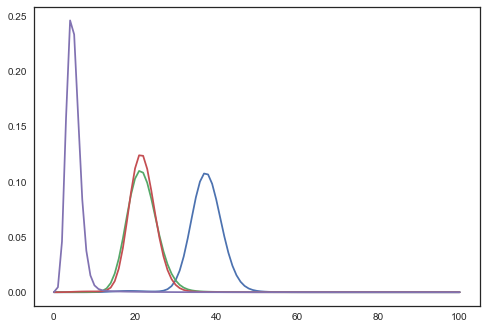

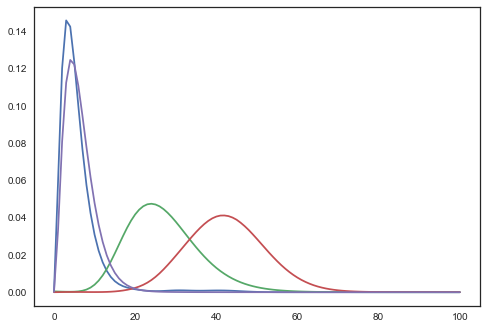

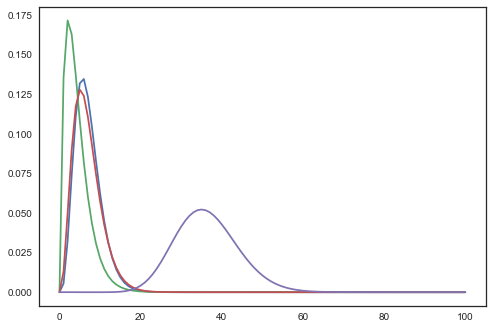

Pt.7


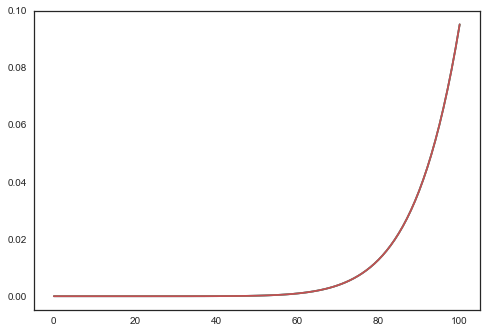

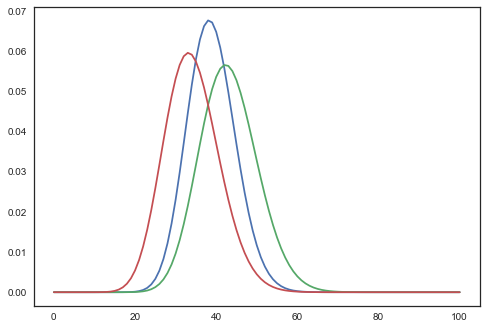

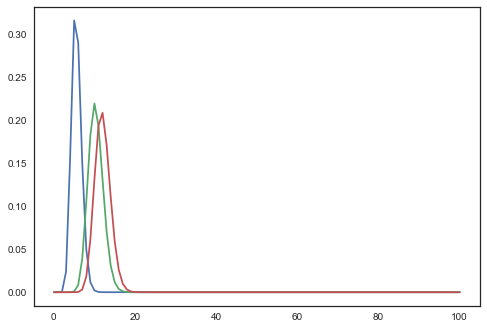

Pt.8


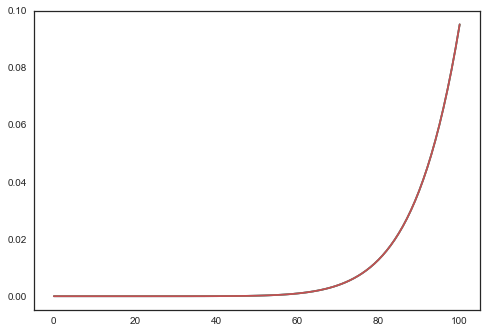

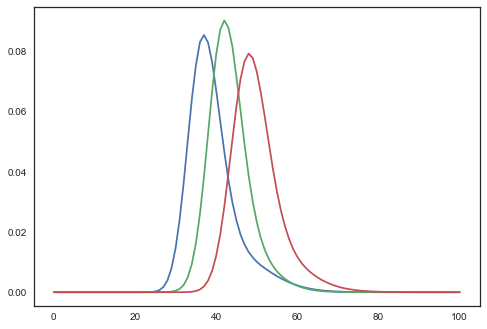

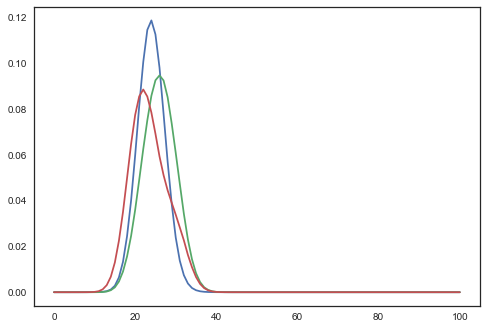

Pt.9


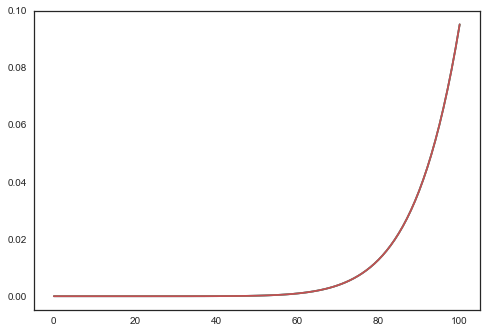

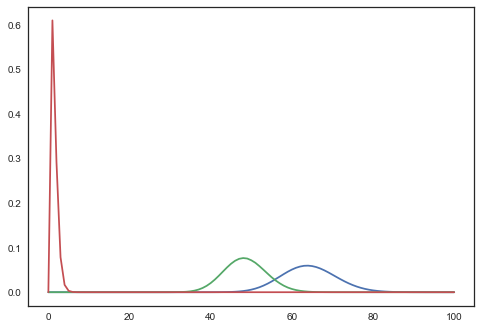

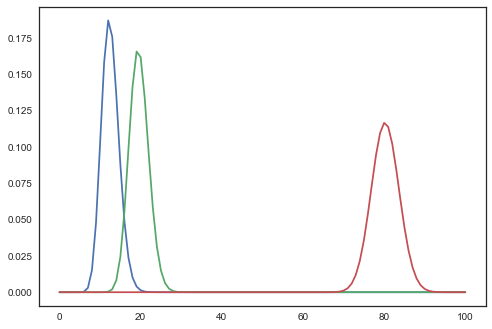

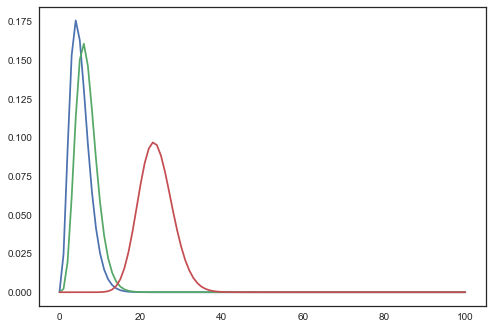

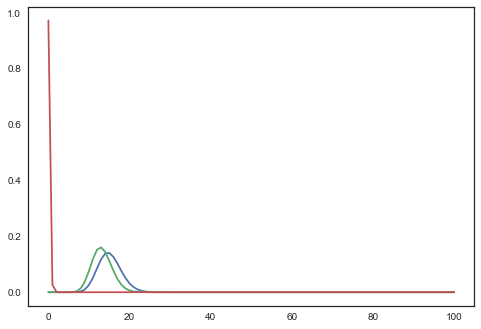

Pt.10


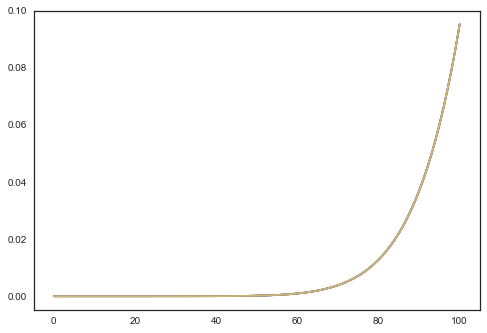

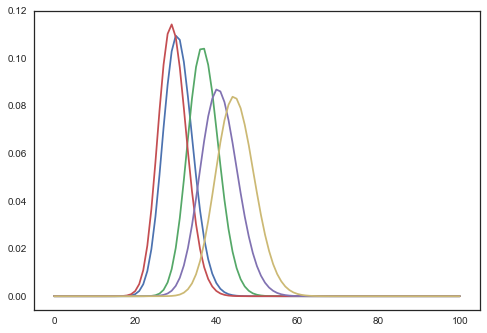

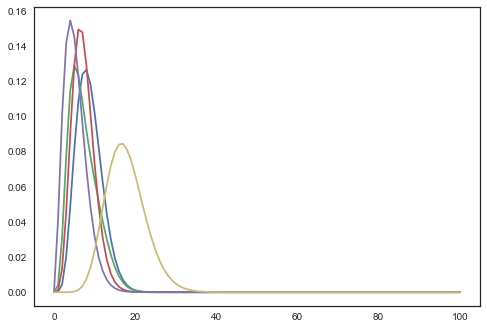

Pt.11


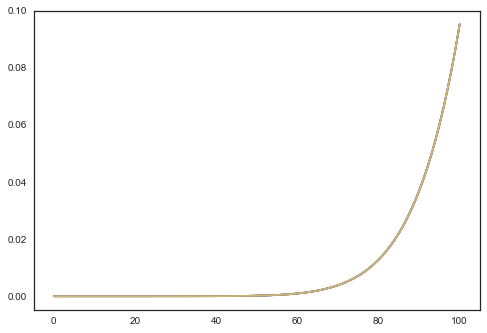

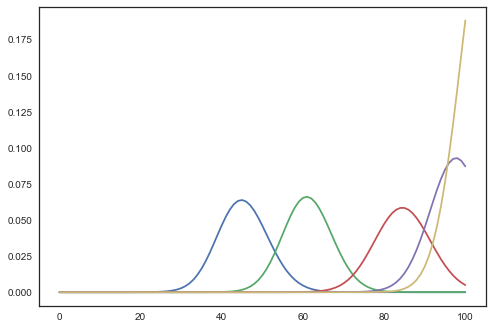

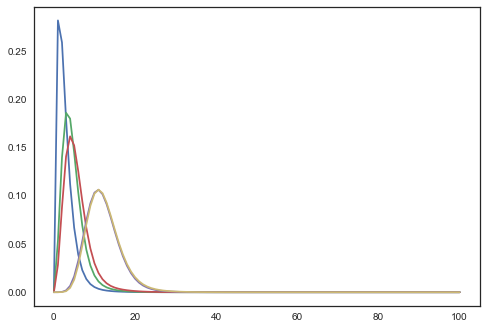

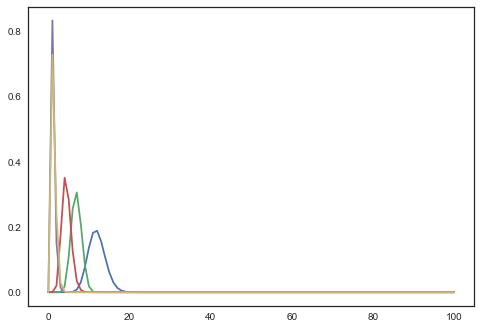

Pt.12


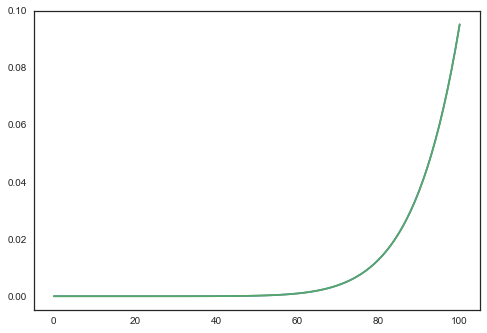

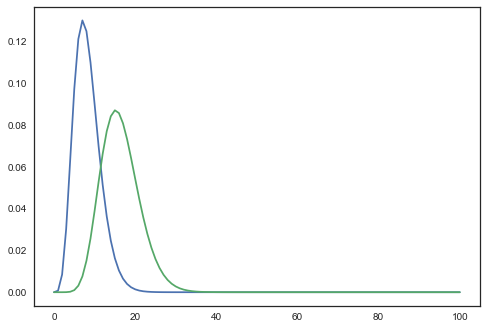

Pt.13


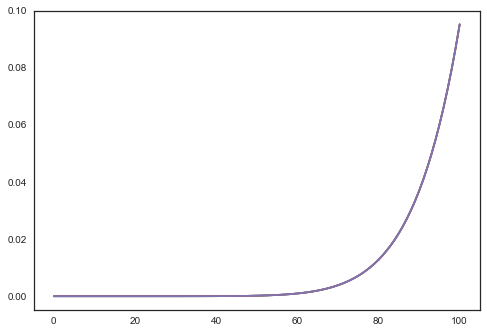

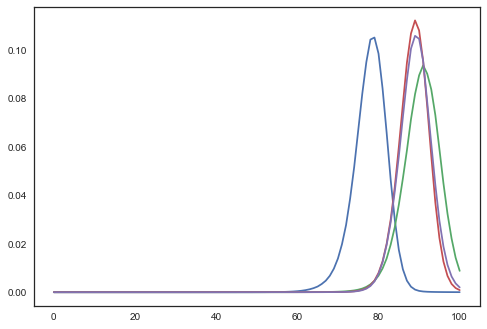

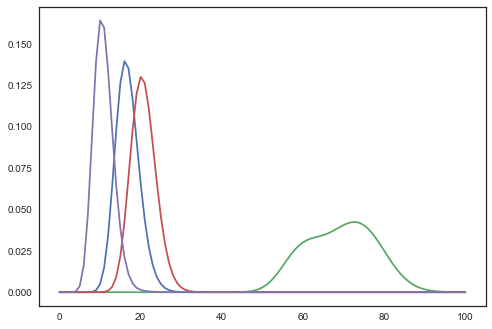

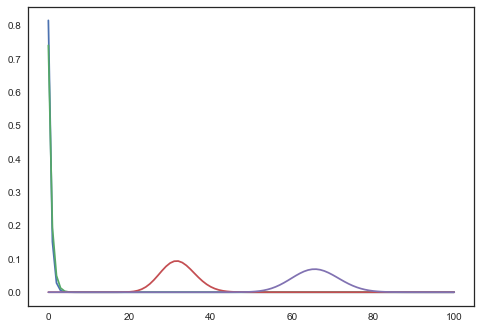

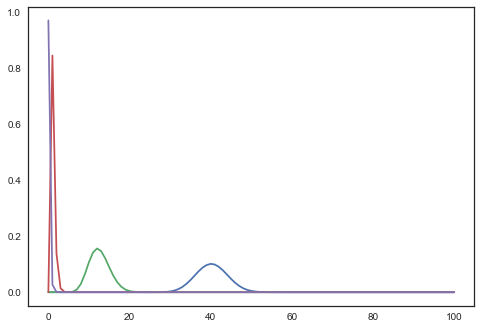

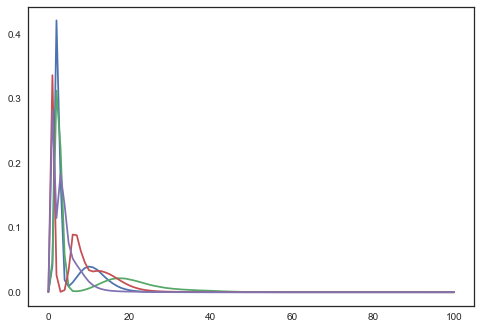

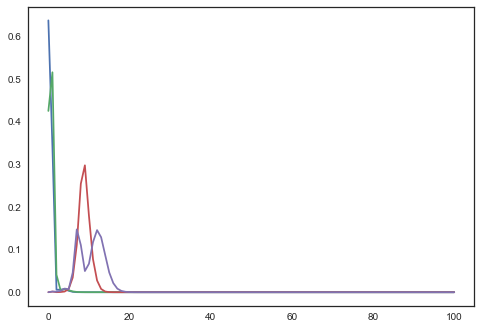

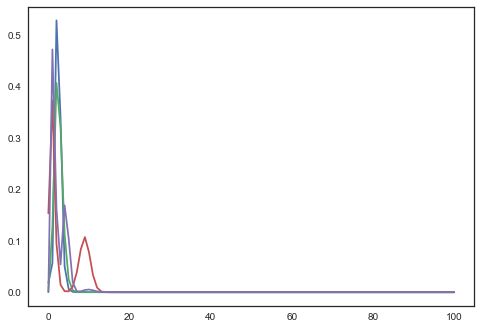

Pt.14


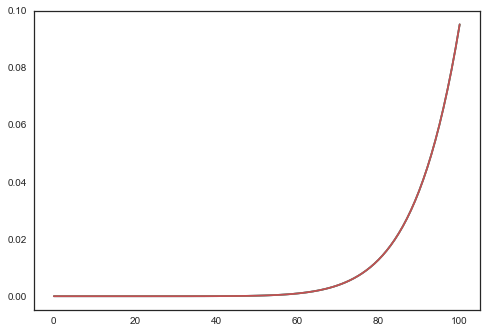

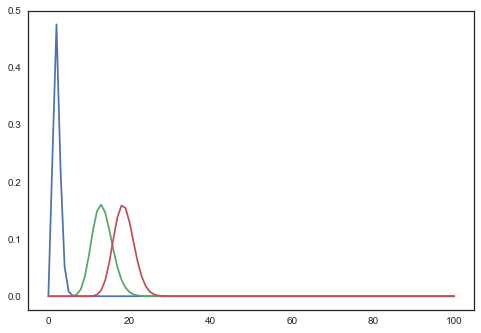

Pt.16


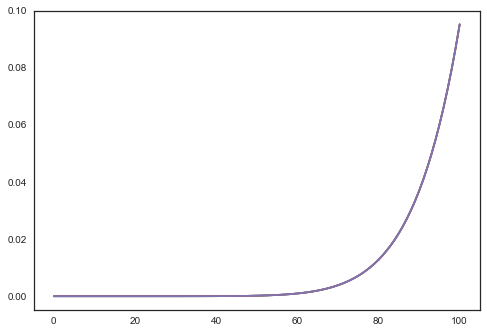

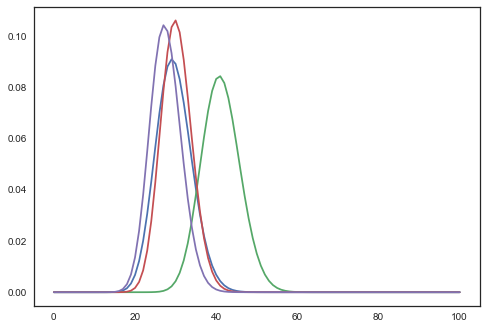

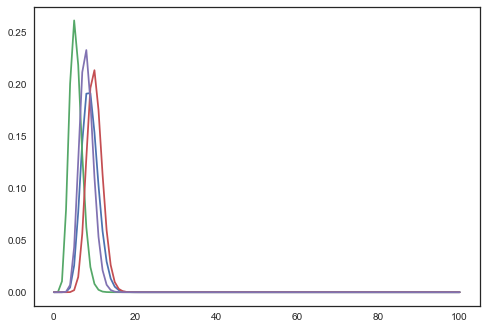

Pt.17


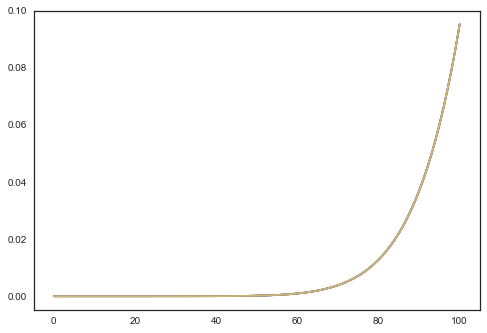

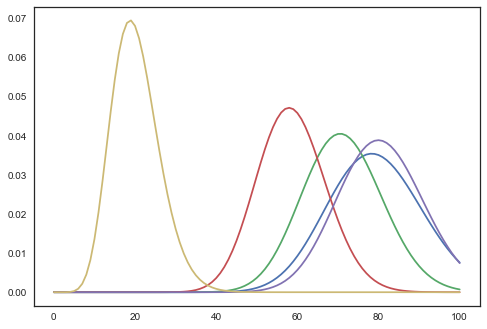

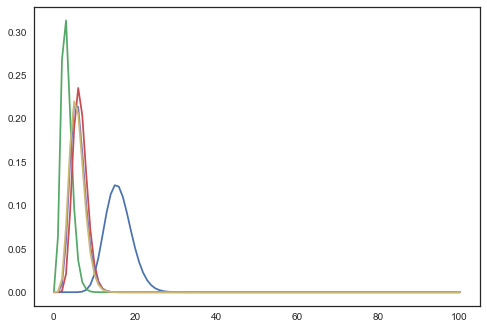

Pt.18


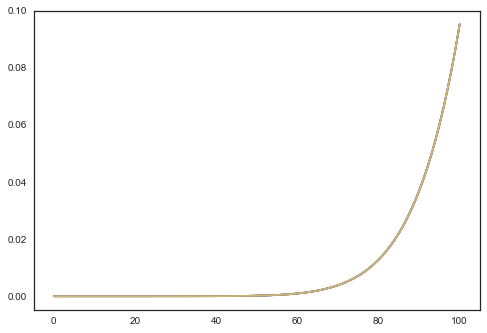

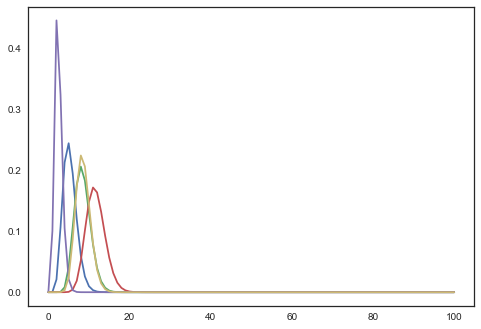

Pt.19


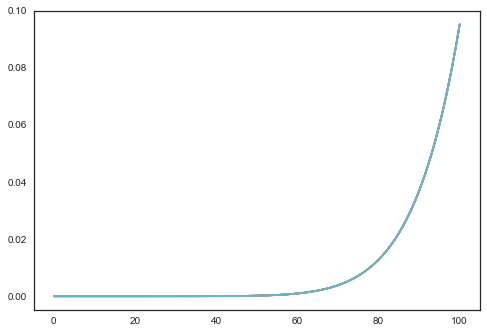

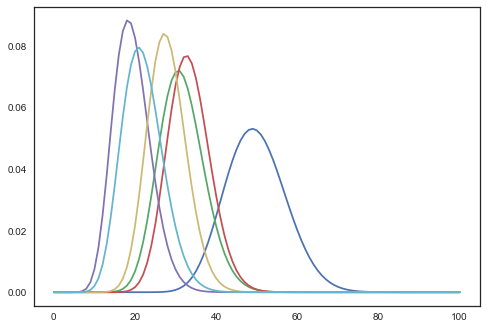

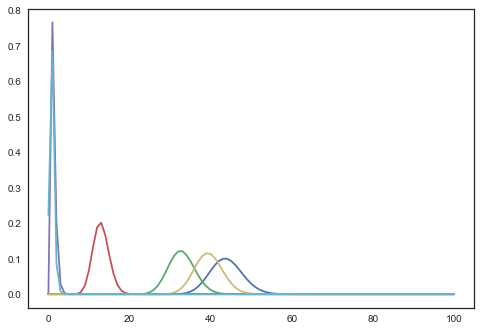

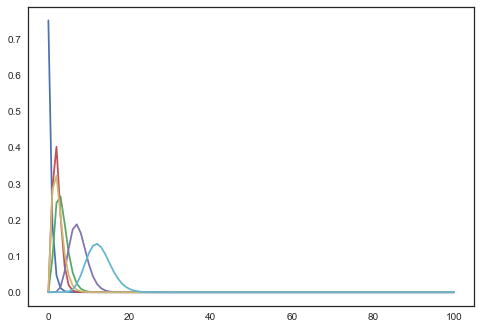

Pt.20


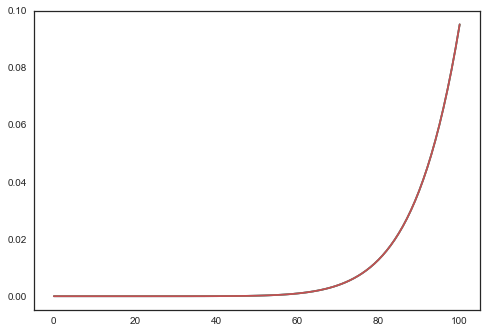

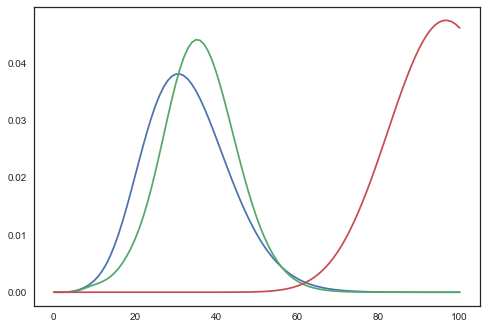

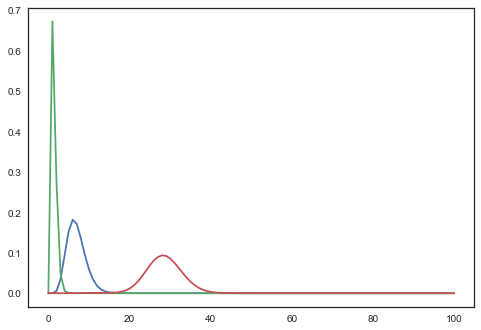

Pt.21


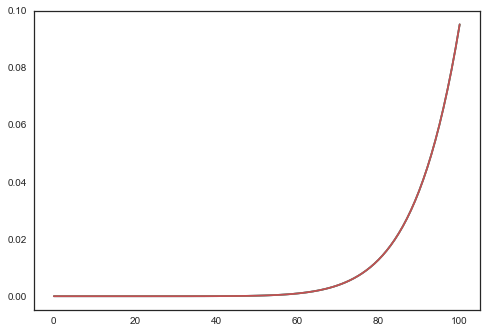

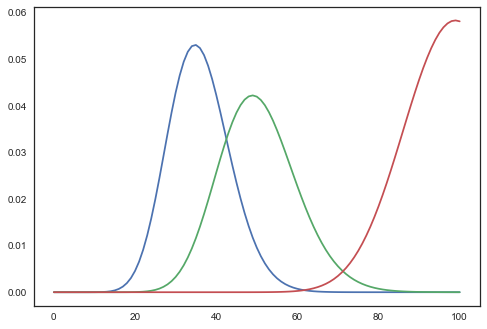

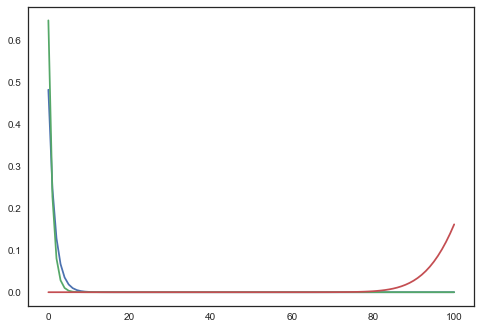

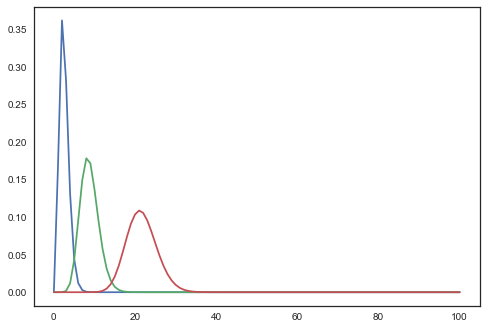

In [68]:
from sselogsumexp import logsumexp

out_f=open("S7_may_2018.tsv","w") 




for pt in range(1,22):
    pt=str(pt)
    if pt == "15":continue
    print "Pt."+pt
    #out_f.write("Pt."+pt+"\t")
    for z_idx,z in enumerate(np.swapaxes(np.sum(np.exp(R["CLL-CRC-"+pt.zfill(4)][0]),axis=0),0,1)):
        out_f.write("Pt."+pt+"\t"+D["CLL-CRC-"+pt.zfill(4)].get(str(z_idx),str(z_idx)))
        for Z in z:
            out_f.write("\t"+ "\t".join([str(x) for x in get_low_hat_high(Z/sum(Z),np.linspace(0,1,101))]))
            

            plt.plot(Z/sum(Z))
        out_f.write("\n")
        plt.show()
out_f.close()

In [23]:
np.sum(R["CLL-CRC-0001"][0],axis=0)/1000

array([[[ -921.10620117,  -438.03292847,  -375.61981201, ...,
           -25.3371563 ,   -24.42737007,   -23.52074814],
        [-1626.33996582,  -280.51269531,  -240.61079407, ...,
          -161.29338074,  -164.98406982,  -168.69506836],
        [-1835.29528809,  -543.71289062,  -481.47940063, ...,
           -89.62500763,   -92.28426361,   -95.0113678 ],
        [-3415.67700195,   -20.59342194,    -9.69536018, ...,
         -2533.6472168 , -2567.17651367, -2600.83837891],
        [-6189.01318359,  -524.4230957 ,  -398.4274292 , ...,
         -1053.40075684, -1073.76586914, -1093.83703613],
        [ -335.25091553,   -15.54739666,   -17.39682007, ...,
          -689.22271729,  -697.98876953,  -706.796875  ]],

       [[ -921.10620117,  -438.03292847,  -375.61981201, ...,
           -25.3371563 ,   -24.42737007,   -23.52074814],
        [-1629.27307129,  -326.34188843,  -279.74258423, ...,
          -187.75248718,  -192.25131226,  -196.76437378],
        [-1834.45019531,  -520.7611084

In [2]:
D={'CLL-CRC-0001': {'0': '0', '1': '2', '2': '1', '3': '4', '4': '3', '5': '5'},
 'CLL-CRC-0002': {'0': '0', '1': '1'},
 'CLL-CRC-0003': {'0': '0', '1': '1', '2': '2', '3': '3'},
 'CLL-CRC-0004': {'0': '0', '1': '1', '2': '3', '3': '4'},
 'CLL-CRC-0005': {'0': '0',
  '1': '2',
  '2': '1',
  '3': '6',
  '4': '3',
  '5': '7',
  '6': '5'},
 'CLL-CRC-0006': {'0': '0', '1': '1', '2': '2', '3': '5', '4': '4'},
 'CLL-CRC-0007': {'0': '0', '1': '2', '2': '3'},
 'CLL-CRC-0008': {'0': '0', '1': '1', '2': '2'},
 'CLL-CRC-0009': {'0': '0', '1': '1', '2': '3', '3': '4', '4': '2'},
 'CLL-CRC-0010': {'0': '0', '1': '2', '2': '3'},
 'CLL-CRC-0011': {'0': '0', '1': '1', '2': '3', '3': '2'},
 'CLL-CRC-0012': {'0': '0', '1': '2'},
 'CLL-CRC-0013': {'0': '0',
  '1': '1',
  '2': '3',
  '3': '8',
  '4': '2',
  '5': '4',
  '6': '6',
  '7': '5'},
 'CLL-CRC-0014': {'0': '0', '1': '1'},
 'CLL-CRC-0015': {'0': '0'},
 'CLL-CRC-0016': {'0': '0', '1': '1', '2': '2'},
 'CLL-CRC-0017': {'0': '0', '1': '1', '2': '2'},
 'CLL-CRC-0018': {'0': '0', '1': '1'},
 'CLL-CRC-0019': {'0': '0', '1': '1', '2': '2', '3': '3'},
 'CLL-CRC-0020': {'0': '0', '1': '1', '2': '2'},
 'CLL-CRC-0021': {'0': '0', '1': '1', '2': '4', '3': '3'}}

```python
out_tsv=open("CLL-Kipps-p_vals_Mar28_2018_f.tsv","w")
out_tsv.write("indiv\tclust\told_gr\tGR_gr_Parent\n")
for pkl_fn in glob.glob("/Users/dlivitz/ipythonNB/Kipps.F.pkl"):
    clusters={}
    indiv=pkl_fn.split(".")[0].split("/")[-1]
    new_membership={}
    if "WGS" in pkl_fn:
        with open("/Users/dlivitz/Documents/Project-CLL_Michi/nd_res_v3/january_freeze_-9_2018_"+indiv+".WGS.cluster.maf") as maf:
            maf.readline()
            for line in maf:
                spl=line.strip("\n").split("\t")
                if spl[14] not in clusters:clusters[spl[14]]=set()
                clusters[spl[14]].add(spl[0])

    else:
        with open("/Users/dlivitz/Documents/Project-CLL_Michi/nd_res_v3/january_freeze_-9_2018_"+indiv+".cluster.maf") as maf:
            maf.readline()
            for line in maf:
                spl=line.strip("\n").split("\t")
                if spl[14] not in clusters:clusters[spl[14]]=set()
                clusters[spl[14]].add(spl[0])
                
    #
    print pkl_fn.split(".pkl")[0] + "\t" +"GR > Parent pval" 

    plt.figure()
    overlap_map=np.zeros([len(clusters),len(old_map[str(int(indiv.split("-")[2]))].items())])
    overlap_map_len=np.zeros([len(clusters),len(old_map[str(int(indiv.split("-")[2]))].items())])
    for c_idx,cluster in clusters.items():
        for o_c_idx,o_cluster in old_map[str(int(indiv.split("-")[2]))].items():
            try:
                overlap_map[int(c_idx)-1,int(o_c_idx)-1]=len(cluster.intersection(o_cluster))/float(len(cluster))
                overlap_map_len[int(c_idx)-1,int(o_c_idx)-1]=len(cluster.intersection(o_cluster))

            except:
                continue
    #sns.heatmap(overlap_map,annot=overlap_map_len)
    if "WGS" in pkl_fn: 
        d={"A":"A"}
    else:
        d={str(i_row):str(np.argmax(row)) for i_row,row in enumerate(overlap_map)}
    pattern = re.compile('|'.join(d.keys()))
    
    
    if "WGS" in pkl_fn: continue
    for new,old in d.items():
        out_tsv.write(indiv+"\t"+old+"\t"+new+"\n")
    D[indiv]=d
    continue

    
    plt.xlabel("old_id")
    plt.ylabel("new_id")
    plt.show()
    with open(pkl_fn) as pkl:
        c_log,trees_by_edge,cluster_rates,cluster_rates_diff,cluster_line_fit_min_lik= cPickle.load(pkl)
    print pkl_fn.split(".pkl")[0] + "\t" +"GR > Parent pval" 
    clusters={}

    for cluster_idx,cluster in cluster_rates_diff.items():
        clusters[int(d.get(str(cluster_idx),str(cluster_idx)))]=[np.nansum(np.array(cluster)[5000:]<0)/len(np.array(cluster)[5000:])]
        #print str(cluster_idx)+"\t%1.3f" % (np.nansum(np.array(cluster)[5000:]<0)/len(np.array(cluster)[5000:])) 
    #print pkl_fn.split(".pkl")[0] + "\t" +"log/exp pval" 
    for cluster_idx,cluster in cluster_line_fit_min_lik.items():
        #print str(cluster_idx)+"\t%1.3f" % (np.nansum(np.array(cluster)[5000:]>0.05)/len(np.array(cluster)[5000:])) 
        clusters[int(d.get(str(cluster_idx),str(cluster_idx)))].append(np.nansum(np.array(cluster)[5000:]>0.05)/len(np.array(cluster)[5000:]))

    for cluster,values in clusters.items():
        out_tsv.write("\t".join([indiv,str(cluster),str(old_gr.get(str(int(indiv.split("-")[2]))+"_"+str(cluster))),str(values[0]),str(values[1])])+"\n")
    continue
    for tree,dist in sorted(trees_by_edge.items(),key=lambda x:-len(x[1])):

        if len(dist) < 1000:continue
        plt.figure(figsize=(12,4))

        plt.subplot(1,3,1)
        plot_nx([[None,0]]+list(eval(pattern.sub(lambda x: d[x.group()], str(list(tree))))),"dot")
        plt.title(indiv+"_old_c")
        plt.subplot(1,3,2)
        plot_nx([[None,0]]+list(tree),"dot")
        plt.title(indiv+"_new_c")
        plt.subplot(1,3,3)
        sns.distplot(dist[100:],label=str(np.nanmean(dist[100:])))
        plt.legend()
        plt.title(len(dist))
        
        
        plt.show()
        
out_tsv.close()
gc.collect()
```

In [15]:
def get_high_low_hat(interval,grid,cut=0.95):
    if min(interval) < 0:raise 
    interval=interval/float(sum(interval))
    ilim=[len(interval)-1,0]

    ysum=0
    for x_idx,y_val in sorted(enumerate(interval),key=lambda x:x[1],reverse=True):
        if ysum >= cut:continue
        if x_idx <= ilim[0]:ilim[0]=x_idx
        if x_idx >= ilim[1]:ilim[1]=min(x_idx+1,len(interval)-1) #fix ccf binning
        ysum+=y_val
    hat=round(grid[np.argmax(interval)],2)
    
    low=round(grid[ilim[0]],2)
    high=round(grid[ilim[1]],2)
    if low == high:
        low = low - 1./(len(grid)-1)/2. if low > 0 else 0
        high = high + 1./(len(grid)-1)/2. if high < 1 else 1 ##using midpoint method for bins. :) 
        
        
    
    return high,low,hat


In [16]:
def get_low_hat_high(interval,grid,cut=0.95):
    if min(interval) < 0:raise 
    interval=interval/float(sum(interval))
    ilim=[len(interval)-1,0]

    ysum=0
    for x_idx,y_val in sorted(enumerate(interval),key=lambda x:x[1],reverse=True):
        if ysum >= cut:continue
        if x_idx <= ilim[0]:ilim[0]=x_idx
        if x_idx >= ilim[1]:ilim[1]=min(x_idx+1,len(interval)-1) #fix ccf binning
        ysum+=y_val
    hat=round(grid[np.argmax(interval)],2)
    
    low=round(grid[ilim[0]],2)
    high=round(grid[ilim[1]],2)
    if low == high:
        low = low - 1./(len(grid)-1)/2. if low > 0 else 0
        high = high + 1./(len(grid)-1)/2. if high < 1 else 1 ##using midpoint method for bins. :) 
        
        
    
    return low,hat,high


In [3]:
import matplotlib.colors as mcolors
def _get_fixed_colors(subclone_key):
        #green, black, blue,purple,orange

    color_list= [[39,140,24],
                 [103,200,243],
                [16,49,41],
                 [248,139,16],  
                  [93,119,254],
                 [152,22,26],
                 [104,236,172],
                 [249,142,135],
                 [55,18,48],
                 [83,82,22],
                 [247,36,36],
                 [0,79,114],
                 [243,65,132],
                 [60,185,179],
                 [185,177,243],
                 [139,34,67],
                 [178,41,186],
                 [58,146,231],
                 [130,159,21],
                 [161,91,243],
                 [131,61,17],
                 [248,75,81],
                 [32,75,32],
                 [45,109,116],
                 [255,169,199],
                 [55,179,113],
                 [34,42,3],
                 [56,121,166],
                 [172,60,15],
                 [115,76,204],
                 [21,61,73],
                 [67,21,74],#Additional colors, uglier and bad
                 [123,88,112],
                 [87,106,46],
                 [37,66,58],
                 [132,79,62],
                 [71,58,32],
                 [59,104,114],
                 [46,107,90],
                 [84,68,73],
                 [90,97,124],
                 [121,66,76],
                 [104,93,48],
                 [49,67,82],
                 [71,95,65],
                 [127,85,44]]

    return color_list[subclone_key]

tableau40 = _get_fixed_colors(slice(None,None,None))

colors=[x for x in tableau40]
for col_new,col_old in d.items():
    colors[int(col_new)]=tableau40[int(col_old)]

phylo_cmap=mcolors.ListedColormap(colors)

#cPickle.dump(E_,open("kipps_log_exp_sum.pkl","w"))
for indiv,p_vals in sorted(E_.items()):
    if indiv not in ["CLL-CRC-0001","CLL-CRC-0004","CLL-CRC-0005","CLL-CRC-0018","CLL-CRC-0019"]:continue
    if indiv != "CLL-CRC-0005":
        den=float(len(R[indiv][-2]))
    else:
        den2=float(len(R[indiv][-2])-1)
    
    plt.title(indiv)
    for cluster_idx,values in p_vals.items():
        
        if len(values) == 0:continue
        #plt.violinplot(np.array(values)/den,positions=[cluster_idx],vert=False,showextrema=False,bw_method=0.8)
        vres=plt.violinplot(np.array(E[indiv][cluster_idx]),positions=[cluster_idx],vert=False,showextrema=False,bw_method=0.8)
        b=vres["bodies"][0]
        plt.plot([],[],linewidth=10,color=[x/255. for x in phylo_cmap.colors[cluster_idx]],label=str(sum(np.array(E[indiv][cluster_idx])>0.05)/float(len(E[indiv][cluster_idx]))))
        b.set_color([x/255. for x in phylo_cmap.colors[cluster_idx]])
        b.set_alpha(1)
    plt.axvline(0.05)
    plt.legend(loc="best")
        
        
    plt.show()

NameError: name 'd' is not defined

In [44]:


vals,bins=np.histogram(cluster_rates[2][100:],bins=102)
high,low,hat=get_high_low_hat(vals,bins)
print high,low,hat

0.09 -0.57 -0.14


In [107]:
import output

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [112]:
def calc_evo(ccf_data):
    import numpy as np
    import sselogsumexp

    def prod_log_sum_exp_sum(x):
       return sselogsumexp.logsumexp(np.sum(x, axis=0, dtype=np.float32))


    def get_logratio(ccf_muts_1, ccf_muts_2, combined_likelihood):
       res = (prod_log_sum_exp_sum(ccf_muts_1) + prod_log_sum_exp_sum(
          ccf_muts_2)) / combined_likelihood  # suboptimal, could pass stacked muts
       # if np.isnan(res):
       #    print prod_log_sum_exp_sum(mutation_array[idx_1]),prod_log_sum_exp_sum(mutation_array[idx_2]),prod_log_sum_exp_sum(mutation_array[np.logical_or(idx_1,idx_2)])
       return res

    def shuffle_muts(idx_1, idx_2):
       max_n_shuffle = min(sum(idx_1), sum(idx_2))
       n_shuffle = np.random.randint(max_n_shuffle) + 1
       flip_1 = np.random.choice(np.where(idx_1)[0], size=n_shuffle, replace=False)
       flip_2 = np.random.choice(np.where(idx_2)[0], size=n_shuffle, replace=False)
       in_either_idx = np.hstack([flip_1, flip_2])
       idx_1[in_either_idx] = np.logical_not(idx_1[in_either_idx])
       idx_2[in_either_idx] = np.logical_not(idx_2[in_either_idx])
       return [idx_1, idx_2]


    def shuffle_muts_by_time(ccf_muts_1, ccf_muts_2):
       # ccf_muts_1 = array of ccfs at sample 1
       # ccf_muts_2 = array of ccfs at sample 2 from same cluster
       if np.shape(ccf_muts_1) != np.shape(ccf_muts_2):
          print("Different number of mutations in time points")
          return -1
       to_flip = np.random.randint(2, size=len(ccf_muts_1))
       # flip 'em
       to_flip = np.array([True if x else False for x in to_flip])
       ccf_muts_1_out = np.vstack([ccf_muts_1[np.logical_not(to_flip)], ccf_muts_2[to_flip]])
       ccf_muts_2_out = np.vstack([ccf_muts_2[np.logical_not(to_flip)], ccf_muts_1[to_flip]])
       return ccf_muts_1_out, ccf_muts_2_out


    def shuffle_n_pval(ccf_muts_1, ccf_muts_2, n):
       pvals = []
       combined_likelihood = prod_log_sum_exp_sum(np.vstack([ccf_muts_1, ccf_muts_2]))
       pvals.append(get_logratio(ccf_muts_1, ccf_muts_2, combined_likelihood))

       for iteration in range(n):
          s_ccf_muts_1, s_ccf_muts_2 = shuffle_muts_by_time(ccf_muts_1, ccf_muts_2)
          pvals.append(get_logratio(s_ccf_muts_1, s_ccf_muts_2, combined_likelihood))
       return pvals

    def calc_percent_below(ccf_1, ccf_2, percent_cutoff=5):
        array_2d = np.atleast_2d(np.atleast_2d(ccf_1)) * np.atleast_2d(ccf_2).T
        return np.sum(np.sum(np.tril(array_2d.T, k=-percent_cutoff)))

    def calc_percent_above(ccf_1, ccf_2, percent_cutoff=5):
        array_2d = np.atleast_2d(np.atleast_2d(ccf_1)) * np.atleast_2d(ccf_2).T
        return np.sum(np.sum(np.triu(array_2d.T, k=percent_cutoff)))

    # params
    min_diff_clust_ccf = 0
    min_clust_ccf = 0
    n_shuffles=10000
    clonal_cutoff = 0.9



    #driver_genes = open("/xchip/cga_home/danielr/PanCanHeterogeneity/Perms/Driver_gene_list_plus_hotspots.txt").read().split("\n")
    driver_genes =plotter.driver_genes #set.union(self.output_obj.driver_genes,self.output_obj.project_specific_drivers)
    #output_dir = "./"
    #output_dir = "/Users/danielr/Desktop/HNSC_Rocco/OPSCC_Rocco/Evolution_Analysis_HNSC_drivers/"


    num_trials = 0
    evolution_by_cluster = {}
    clonal_driver_muts = []

    cluster_gene_names={}
    for mut in ccf_data.sample_list[0].concordant_variants:
        if mut.cluster_assignment-1 not in cluster_gene_names:cluster_gene_names[mut.cluster_assignment-1]=set()
        cluster_gene_names[mut.cluster_assignment-1].add(mut.gene)

    ccf_1d_matrix = []
    for mut in ccf_data.sample_list[0].concordant_variants:
      ccf_1d_matrix.append(
         [x.get_mut_by_varstr(mut.var_str).ccf_1d for x in ccf_data.sample_list])
    ccf_1d_matrix = np.log(np.array(ccf_1d_matrix)+1e-20)
    print np.shape(ccf_1d_matrix)
    assign=np.array([x.cluster_assignment for x in ccf_data.sample_list[0].concordant_variants])
    for i, cluster_assign in enumerate(sorted(set(assign))):

      evolution_by_cluster[cluster_assign] = {}

      for time_ind_1, time_ind_2 in itertools.combinations(range(len(ccf_data.sample_list)),2): #zip(range(len(dump_data[1]))[:-1], range(len(dump_data[1]))[1:])
         mut_ccfs_1 = ccf_1d_matrix[assign==cluster_assign, time_ind_1, :]
         mut_ccfs_2 = ccf_1d_matrix[assign==cluster_assign, time_ind_2, :]
         sum_1 = np.array(np.sum(mut_ccfs_1, axis=0), dtype=np.float32)
         sum_1 -= sselogsumexp.logsumexp(sum_1)
         clust_dist_1 = np.exp(sum_1) / np.sum(np.exp(sum_1))
         sum_2 = np.array(np.sum(mut_ccfs_2, axis=0), dtype=np.float32)
         sum_2 -= sselogsumexp.logsumexp(sum_2)
         clust_dist_2 = np.exp(sum_2) / np.sum(np.exp(sum_2))
         clust_ccf_1 = np.argmax(clust_dist_1) / float(100)
         clust_ccf_2 = np.argmax(clust_dist_2) / float(100)

         increase_y_n=calc_percent_above(clust_dist_1,clust_dist_2)
         decrease_y_n=calc_percent_below(clust_dist_1,clust_dist_2)


         if increase_y_n > 0.95:
             evo_call = "+"
         elif decrease_y_n > 0.95:
             evo_call = "-"
         else:
             evo_call = "stable"



         pvals=shuffle_n_pval(mut_ccfs_1,mut_ccfs_2,n_shuffles)


         num_trials += 1
         evolution_by_cluster[cluster_assign][frozenset({time_ind_1,time_ind_2})] = {}
         evolution_by_cluster[cluster_assign][frozenset({time_ind_1,time_ind_2})]['ccf_evolution'] = evo_call
         evolution_by_cluster[cluster_assign][frozenset({time_ind_1,time_ind_2})]['ccf_difference'] = clust_ccf_2 - clust_ccf_1
         evolution_by_cluster[cluster_assign][frozenset({time_ind_1,time_ind_2})]['ccf_before_after'] = [clust_ccf_1,clust_ccf_2]
         evolution_by_cluster[cluster_assign][frozenset({time_ind_1,time_ind_2})]['log_ratio'] = pvals[0]
         evolution_by_cluster[cluster_assign][frozenset({time_ind_1,time_ind_2})]['p_value_landau'] = 1-max([decrease_y_n,increase_y_n])
         evolution_by_cluster[cluster_assign][frozenset({time_ind_1,time_ind_2})]['p_value'] = sum(np.array(pvals) <= pvals[0]) / float(len(pvals)) #min([sum(np.array(pvals) <= pvals[0]) / float(len(pvals))*len(set(assign)),1.0])
         evolution_by_cluster[cluster_assign][frozenset({time_ind_1,time_ind_2})]['alt_p_value'] = sum(np.array(pvals) < pvals[0]) / float(len(pvals))#*len(set(assign)) min([sum(np.array(pvals) < pvals[0]) / float(len(pvals))*len(set(assign)),1.0])
         evolution_by_cluster[cluster_assign][frozenset({time_ind_1,time_ind_2})]['increase_y_n'] = sum(np.array(pvals) < pvals[0]) / float(len(pvals))#*len(set(assign)) min([sum(np.array(pvals) < pvals[0]) / float(len(pvals))*len(set(assign)),1.0])
         evolution_by_cluster[cluster_assign][frozenset({time_ind_1,time_ind_2})]['num_muts'] = len(mut_ccfs_1)
         evolution_by_cluster[cluster_assign][frozenset({time_ind_1,time_ind_2})]['driver_muts'] = ""


    with open(ccf_data.indiv_name+".2.clonal_changes.txt","w") as output:
      output.write("indiv\tcluster\tcomparison\tp_value_landau\tp_value\ttotal_number_mutations\tccf_1\tccf_2\tccf_difference\tdriver_mutations\tevolution\tsignificance_call\n")
      for clust in evolution_by_cluster.keys():
         for comp in evolution_by_cluster[clust].keys():
            output.write(indiv+"\t"+D[indiv].get(str(clust-1),str(clust-1))+"\t"+"_vs_".join([str(x+1) for x in comp])+"\t"+str(evolution_by_cluster[clust][comp]['p_value_landau'])+"\t"+str(evolution_by_cluster[clust][comp]['p_value'])+"\t"+
                      str(evolution_by_cluster[clust][comp]['num_muts'])+"\t" +str(evolution_by_cluster[clust][comp]["ccf_before_after"][0])+"\t"+str(evolution_by_cluster[clust][comp]["ccf_before_after"][1])+"\t"+str(evolution_by_cluster[clust][comp]['ccf_difference'])+"\t"+
                      str(evolution_by_cluster[clust][comp]['driver_muts'])+"\t"+str(evolution_by_cluster[clust][comp]['ccf_evolution'])+"\t")


            significance=""
            if evolution_by_cluster[clust][comp]['p_value'] < 0.05:
                significance = "significant"
            #elif evolution_by_cluster[clust][comp]['alt_p_value'] < 0.05:
            #    significance = "potentially_significant"
            else:
                significance = "not_significant"

            if evolution_by_cluster[clust][comp]['num_muts'] < 3:
                significance = "NA-low_n_muts"
            if evolution_by_cluster[clust][comp]['ccf_evolution'] == "stable":
                significance = "NA-stable"


            output.write(significance+"\n")


    #with open(output_dir+nd_pkl.split(".")[0]+".clonal_driver_muts.txt","w") as output:
    #  output.write("\n".join(clonal_driver_muts))
    return evolution_by_cluster


In [113]:
D={'CLL-CRC-0001': {'0': '0', '1': '2', '2': '1', '3': '4', '4': '3', '5': '5'},
 'CLL-CRC-0002': {'0': '0', '1': '1'},
 'CLL-CRC-0003': {'0': '0', '1': '1', '2': '2', '3': '3'},
 'CLL-CRC-0004': {'0': '0', '1': '1', '2': '3', '3': '4'},
 'CLL-CRC-0005': {'0': '0',
  '1': '2',
  '2': '1',
  '3': '6',
  '4': '3',
  '5': '7',
  '6': '5'},
 'CLL-CRC-0006': {'0': '0', '1': '1', '2': '2', '3': '5', '4': '4'},
 'CLL-CRC-0007': {'0': '0', '1': '2', '2': '3'},
 'CLL-CRC-0008': {'0': '0', '1': '1', '2': '2'},
 'CLL-CRC-0009': {'0': '0', '1': '1', '2': '3', '3': '4', '4': '2'},
 'CLL-CRC-0010': {'0': '0', '1': '2', '2': '3'},
 'CLL-CRC-0011': {'0': '0', '1': '1', '2': '3', '3': '2'},
 'CLL-CRC-0012': {'0': '0', '1': '2'},
 'CLL-CRC-0013': {'0': '0',
  '1': '1',
  '2': '3',
  '3': '8',
  '4': '2',
  '5': '4',
  '6': '6',
  '7': '5'},
 'CLL-CRC-0014': {'0': '0', '1': '1'},
 'CLL-CRC-0015': {'0': '0'},
 'CLL-CRC-0016': {'0': '0', '1': '1', '2': '2'},
 'CLL-CRC-0017': {'0': '0', '1': '1', '2': '2'},
 'CLL-CRC-0018': {'0': '0', '1': '1'},
 'CLL-CRC-0019': {'0': '0', '1': '1', '2': '2', '3': '3'},
 'CLL-CRC-0020': {'0': '0', '1': '1', '2': '2'},
 'CLL-CRC-0021': {'0': '0', '1': '1', '2': '4', '3': '3'}}
import glob,itertools
plotter=output.PhylogicOutput()
for pkl_fn in glob.glob("/Users/dlivitz/Documents/Project-CLL_Michi/nd_res_v3/january_freeze_-9_2018*.pkl"):
    indiv=pkl_fn.split(".")[0].split("/")[-1].split("_")[-1]
    res=cPickle.load(open(pkl_fn))
    calc_evo(res)


(29, 4, 101)
(21, 3, 101)
(390, 3, 101)
(37, 4, 101)
(60, 5, 101)
(28, 4, 101)
(31, 3, 101)
(30, 3, 101)
(36, 3, 101)
(25, 5, 101)
(26, 5, 101)
(15, 2, 101)
(299, 4, 101)
(18, 3, 101)
(20, 3, 101)
(46, 4, 101)
(29, 5, 101)
(21, 5, 101)
(31, 6, 101)
(19, 3, 101)
(22, 3, 101)


In [53]:
calc_evo(res)


AttributeError: 'list' object has no attribute 'sample_list'

In [ ]:
for pkl_fn in glob.glob("/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-*.*pkl"):
    clusters={}
    indiv=pkl_fn.split(".")[0].split("/")[-1]
    new_membership={}
    if "WGS" in pkl_fn:
        with open("/Users/dlivitz/Documents/Project-CLL_Michi/nd_res_v3/january_freeze_-9_2018_"+indiv+".WGS.cluster.maf") as maf:
            maf.readline()
            for line in maf:
                spl=line.strip("\n").split("\t")
                if spl[14] not in clusters:clusters[spl[14]]=set()
                clusters[spl[14]].add(spl[0])

    else:
        with open("/Users/dlivitz/Documents/Project-CLL_Michi/nd_res_v3/january_freeze_-9_2018_"+indiv+".cluster.maf") as maf:
            maf.readline()
            for line in maf:
                spl=line.strip("\n").split("\t")
                if spl[14] not in clusters:clusters[spl[14]]=set()
                clusters[spl[14]].add(spl[0])
                
    #
    print pkl_fn.split(".pkl")[0] + "\t" +"GR > Parent pval" 



```python 
out_tsv=open("CLL-Kipps-p_vals_Mar28_2018_f.tsv","w")
out_tsv.write("indiv\tclust\told_gr\tGR_gr_Parent\n")
for indiv,res in sorted(R.items()):
    print indiv
    d=D[indiv]
    
    c_log,trees_by_edge,cluster_rates,cluster_rates_diff,cluster_line_fit_min_lik,times,wbc= res
    clusters={}

    for cluster_idx,cluster in cluster_rates_diff.items():
        vals,bins=np.histogram(clusteacr,bins=102)
        high,low,hat=get_high_low_hat(vals,bins)
        clusters[int(d.get(str(cluster_idx),str(cluster_idx)))]=[np.nansum(np.array(cluster)[100:]<0)/len(np.array(cluster)[100:]),high,low,hat]
        #print str(cluster_idx)+"\t%1.3f" % (np.nansum(np.array(cluster)[5000:]<0)/len(np.array(cluster)[5000:])) 
    for cluster_idx,cluster in cluster_rates.items():
        vals,bins=np.histogram(cluster,bins=102)
        high,low,hat=get_high_low_hat(vals,bins)
        clusters[int(d.get(str(cluster_idx),str(cluster_idx)))].extend([high,low,hat])
        #print str(cluster_idx)+"\t%1.3f" % (np.nansum(np.array(cluster)[5000:]<0)/len(np.array(cluster)[5000:])) 

    for cluster,values in clusters.items():
        out_tsv.write("\t".join([indiv,str(cluster),str(old_gr.get(str(int(indiv.split("-")[2]))+"_"+str(cluster))),str(values[0]),str(values[3]),str(values[1]),str(values[2]),str(values[6]),str(values[4]),str(values[5])])+"\n")
    continue
    for tree,dist in sorted(trees_by_edge.items(),key=lambda x:-len(x[1])):

        if len(dist) < 1000:continue
        plt.figure(figsize=(12,4))

        plt.subplot(1,3,1)
        plot_nx([[None,0]]+list(eval(pattern.sub(lambda x: d[x.group()], str(list(tree))))),"dot")
        plt.title(indiv+"_old_c")
        plt.subplot(1,3,2)
        plot_nx([[None,0]]+list(tree),"dot")
        plt.title(indiv+"_new_c")
        plt.subplot(1,3,3)
        sns.distplot(dist[100:],label=str(np.nanmean(dist[100:])))
        plt.legend()
        plt.title(len(dist))
        
        
        plt.show()
        
out_tsv.close()
gc.collect()
```


In [13]:
import networkx as nx
def get_phylo_adj_ccf_dist(cluster_dens,tree_obj):
    cluster_dens=np.exp(cluster_dens)
    cluster_dens_adj=np.swapaxes(cluster_dens,0,1).tolist()
    cluster_dens_org=np.swapaxes(cluster_dens,0,1).tolist()
    
    for c_idx,cluster in enumerate(np.swapaxes(cluster_dens,0,1)):
        if c_idx not in tree_obj.nodes():continue
        for child in tree_obj.successors(c_idx):
            for tp in range(len_pre_tp):
                cluster_dens_adj[c_idx][tp]=diff_ccf_uneven(cluster_dens_adj[c_idx][tp],cluster_dens_org[child][tp])
    
    return np.swapaxes(np.array(cluster_dens_adj),0,1)

def diff_ccf_uneven(ccf1, ccf2):
        # Histogram of CCF1-CCF2
        
        #if len(ccf2) < len(ccf1):
        #    ccf2=np.array(ccf2[::-1])
        #    ccf2.resize(np.shape(ccf1))
        #    ccf2=np.array(ccf2[::-1])
                          
            

        ccf_dist1 = np.append(ccf1, [0] * len(ccf1))
        ccf_dist2 = np.append(ccf2, [0] * len(ccf1))
        
        
        
    
        
        
        convoluted_dist = []
        for k in range(len(ccf1)):
            inner_product = np.inner(ccf_dist1[0:len(ccf1)], ccf_dist2[len(ccf1) - 1 - k:2 * len(ccf1) - 1 - k])
            convoluted_dist.append(inner_product)
        for k in range(1, len(ccf1)):
            inner_product = np.inner(ccf_dist2[0:len(ccf1)], ccf_dist1[k:len(ccf1) + k])
            convoluted_dist.append(inner_product)
            # verfied edge cases:
            #   [0,0,0...0,0,1] - [0,0,0...0,0,1]; [0,...0,1,0...,0] - [0,...,0,1,0,...,0]; [0,...1,0,0...,0] - [0,...,0,1,0,...,0]
            #   and a few other ones.
        res1=np.array(convoluted_dist[len(ccf1)-1:])/float(sum(convoluted_dist))
        #res1[0]+=float(sum(convoluted_dist[:len(ccf1)-1]))
        return res1
    


In [1]:

plt.plot(adj_dens)

NameError: name 'plt' is not defined

In [5]:
def line_fit_err(x):
        slope,intercept=x

        y_domain=[np.log(grid*wbc[tp_idx]+1e-40) for tp_idx in range(len_pre_tp)] #[np.log((grid-transformation[tp_idx])*wbc[tp_idx]+1e-40) for tp_idx in range(len_pre_tp)]
        y_weights=[adj_dens[tp_idx][c_idx] for tp_idx in range(len_pre_tp)]
        

        line_y_vals=slope*fb_x_vals+intercept

        selected_weight=[
            min(
                sum(y_weights[tp_idx][:min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100)+1]),
                sum(y_weights[tp_idx][min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100):])
            )
            for tp_idx in range(len_pre_tp)]

        return -sum(selected_weight)

def line_fit_pval(x):
        slope,intercept=x

        y_domain=[np.log(grid*wbc[tp_idx]+1e-40) for tp_idx in range(len_pre_tp)] #[np.log((grid-transformation[tp_idx])*wbc[tp_idx]+1e-40) for tp_idx in range(len_pre_tp)]
        y_weights=[adj_dens[tp_idx][c_idx] for tp_idx in range(len_pre_tp)]
        

        line_y_vals=slope*fb_x_vals+intercept

        selected_weight=[
            min(
                sum(y_weights[tp_idx][:min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100)+1]),
                sum(y_weights[tp_idx][min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100):])
            )
            for tp_idx in range(len_pre_tp)]

        return min(selected_weight)

from scipy.stats import linregress



grid=np.linspace(0,1,101)

NameError: name 'np' is not defined

In [6]:
import scipy.optimize
import bisect

In [161]:
phlyo_adj_ccf_no_gl

array([ 12.02416168,  13.34493181,  14.37918965,  14.27381009])

In [83]:
import collections
E_={}
for indiv,res in sorted(R.items()):
    if indiv not in ["CLL-CRC-0001","CLL-CRC-0004","CLL-CRC-0005","CLL-CRC-0018","CLL-CRC-0019"]:continue #

    print indiv
    
    
    d=D[indiv]
    
    c_log,trees_by_edge,cluster_rates,cluster_rates_diff,cluster_line_fit_min_lik,wbc,times = res
    if indiv == "CLL-CRC-0005":
        times[-1]=-1*abs(times[-1])
    wbc=np.array(wbc)*10**9/1000.
    clusters={}
    tree,_=sorted(trees_by_edge.items(),key=lambda x:len(x[1]),reverse=True)[0]
    try: n_pre_tp=list(np.sign(times)).index(-1)
    except: n_pre_tp=len(times)
    len_pre_tp=n_pre_tp
        
    fb_x_vals=np.array(times[:len_pre_tp])  

    tree=nx.DiGraph(list(tree))
    
    log_exp_pval={x:{} for x in tree.nodes()}
    
    
    n_clusters=len(c_log[0][0])
    n_timepoints=len(c_log[0])
    
    
    
    
    
    
    edges=tree.edges()
        
    #print edges
    parents=[None]*n_clusters     #make zero cluster child of clonal cluster. 
    siblings=[None]*n_clusters  #which forces it further to zero
    children=[None]*n_clusters

    for edge in edges:
        parents[edge[1]]=edge[0]

    parents=np.array(parents)

    #for cluster in bl_clusters:
    #    parents[cluster]=None

    for cluster_idx,parent in enumerate(parents):
        if parent != None and not np.isnan(parent):
            if children[parent] == None:children[parent]=[]
            children[parent].append(cluster_idx)

    #for cluster in rm_clusters:
    #    parents[cluster]=np.nan

    for cluster,n_shared in collections.Counter(parents).items():
        if n_shared > 1:
            shared_clusters = np.where(parents==cluster)[0]
            for shared_cluster in shared_clusters:
                siblings[shared_cluster]=list(shared_clusters[shared_clusters != shared_cluster])
    for iter_ in  c_log[-1000:]:
        cluster_densities=iter_
        
        #adj_dens=get_phylo_adj_ccf_dist(iter_,tree)
        print ".",
        for cluster in tree.nodes():
            if type(cluster) != int :continue
            phlyo_adj_ccf=[]
            phlyo_adj_ccf_no_gl=[]
            for tp in range(n_timepoints):
                if tp < n_pre_tp:
                    phlyo_adj_ccf_n=np.argmax(cluster_densities[tp][cluster])/100.
                    phlyo_adj_ccf_no_gl_n=np.argmax(cluster_densities[tp][cluster])/100.
                    if children[cluster] is not None:
                        for child in children[cluster]:
                            phlyo_adj_ccf_n-=np.argmax(cluster_densities[tp][child])/100.
                            #if child not in gl_clusters:
                            phlyo_adj_ccf_no_gl_n-=np.argmax(cluster_densities[tp][child])/100.
                    phlyo_adj_ccf.append(np.log(phlyo_adj_ccf_n*wbc[tp]+0.0001))
                    phlyo_adj_ccf_no_gl.append(np.log(phlyo_adj_ccf_no_gl_n*wbc[tp]+0.0001))
                    
                    
                
            phlyo_adj_ccf_no_gl=np.array(phlyo_adj_ccf_no_gl)

        
            fb_x_vals=np.array(times[:n_pre_tp])

            transformation= np.array([np.argmax(cluster_densities[tp_idx][cluster])/100. for tp_idx in range(n_pre_tp)])-np.exp(np.array(phlyo_adj_ccf_no_gl))/np.array(wbc[:n_pre_tp])

            valid_tp=[tp_idx for tp_idx in range(n_pre_tp) if np.argmax(cluster_densities[tp_idx][cluster]) > 1 and phlyo_adj_ccf_no_gl[tp_idx] > 0]
            if len(valid_tp) == 0:continue
            if len(valid_tp) < 3 :continue

            valid_tp=range(min(valid_tp),n_pre_tp)
            if len(valid_tp) == 0:continue
            fit_res=linregress(np.array(times[0:n_pre_tp])[phlyo_adj_ccf_no_gl>0],phlyo_adj_ccf_no_gl[phlyo_adj_ccf_no_gl>0])

            def line_fit_err(x):
                slope,intercept=x
                y_domain=[np.log((grid-transformation[tp_idx])*wbc[tp_idx]+1e-40) for tp_idx in range(n_pre_tp)]
                for tp_idx in range(n_pre_tp):
                    y_domain[tp_idx][np.logical_not(np.isfinite(y_domain[tp_idx]))]=np.log(1e-40)
                y_weights=[np.exp(cluster_densities[tp_idx][cluster]) for tp_idx in range(n_pre_tp)]

                line_y_vals=slope*fb_x_vals+intercept
                #print y_domain[tp_idx],line_y_vals[tp_idx]
                
                
                if line_y_vals[tp_idx] > max(y_domain[tp_idx]): return 0.5*len(line_y_vals)
                if line_y_vals[tp_idx] < min(y_domain[tp_idx]): return 0.5*len(line_y_vals)
                
                #bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx])
                
                
                selected_weight=[
                    1-min(
                        sum(y_weights[tp_idx][:min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100)+1]),
                        sum(y_weights[tp_idx][min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100):])
                    )
                    for tp_idx in valid_tp]
                return np.sum(selected_weight)

            def line_fit_pval(x):
                slope,intercept=x
                y_domain=[np.log((grid-transformation[tp_idx])*wbc[tp_idx]+1e-40) for tp_idx in range(n_pre_tp)]
                for tp_idx in range(n_pre_tp):
                    y_domain[tp_idx][np.logical_not(np.isfinite(y_domain[tp_idx]))]=np.log(1e-40)
                y_weights=[np.exp(cluster_densities[tp_idx][cluster]) for tp_idx in range(n_pre_tp)]

                line_y_vals=slope*fb_x_vals+intercept
            
                if line_y_vals[tp_idx] > max(y_domain[tp_idx]): return 1
                if line_y_vals[tp_idx] < min(y_domain[tp_idx]): return 1
                

                
                
                #print y_domain[tp_idx],line_y_vals[tp_idx]
                selected_weight=[
                    1-min(
                        sum(y_weights[tp_idx][:min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100)+1]),
                        sum(y_weights[tp_idx][min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100):])
                    )
                    for tp_idx in valid_tp]
                return np.max(selected_weight)
            try:
                o_res=scipy.optimize.minimize(line_fit_err,[fit_res.slope,fit_res.intercept],method="Nelder-Mead")
                slope_f,intercept_f=o_res.x
                p_val_cut=1 - line_fit_pval([slope_f,intercept_f])
                if not o_res.success:
                    continue
            except ValueError:
                continue




            if len(points) not in log_exp_pval[cluster]:log_exp_pval[cluster][len(points)]=[]
            log_exp_pval[cluster][len(points)].append(p_val_cut)


        
        
        
        
        
        
        
        
        
        
        
        #for c_idx in tree.nodes():
        #    if type(c_idx) != int :continue
        #    fit_res=linregress(fb_x_vals,((np.log(np.argmax(adj_dens,axis=2)/100.+0.001).T[c_idx])+np.log(wbc))[:len_pre_tp])
        #    slope_f,intercept_f=scipy.optimize.minimize(line_fit_err,[fit_res.slope,fit_res.intercept],method="Nelder-Mead").x
            
            
    print ""
    E_[indiv]=log_exp_pval.copy()



CLL-CRC-0001
. . . . . .

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:129: RuntimeWarning: invalid value encountered in log


 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in greater


 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

KeyboardInterrupt: 

In [82]:
log_exp_pval

{0: [], 1: [], 2: [], 3: [], 4: [], 5: []}

. . . . . . . . . . . . . .

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in greater


 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


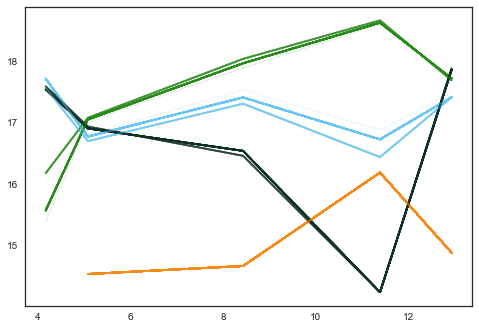

In [238]:
cluster_dens=c_log[-1]






c_log,trees_by_edge,cluster_rates,cluster_rates_diff,cluster_line_fit_min_lik,wbc,times = R["CLL-CRC-0019"]
if indiv == "CLL-CRC-0005":
    times[-1]=-1*abs(times[-1])

tree,_=sorted(trees_by_edge.items(),key=lambda x:len(x[1]),reverse=True)[0]

tree=nx.DiGraph(list(tree))

for cluster_dens in c_log[-100:]:
    cluster_densities=cluster_dens
    clonal_dens = [scipy.stats.beta(10,1).pdf(np.linspace(0,1,101)) for x in range(n_timepoints)]
    clonal_dens = np.array([np.log(x/sum(x)+1e-40) for x in clonal_dens])
    cluster_densities=np.swapaxes(cluster_densities,0,1)
    cluster_densities[0]=clonal_dens
    cluster_densities=np.swapaxes(cluster_densities,0,1)


    #adj_dens=get_phylo_adj_ccf_dist(iter_,tree)
    print ".",
    for cluster in tree.nodes():
        if type(cluster) != int :continue
        phlyo_adj_ccf=[]
        phlyo_adj_ccf_no_gl=[]
        for tp in range(n_timepoints):
            if tp < n_pre_tp:
                phlyo_adj_ccf_n=np.argmax(cluster_densities[tp][cluster])/100.
                phlyo_adj_ccf_no_gl_n=np.argmax(cluster_densities[tp][cluster])/100.
                if children[cluster] is not None:
                    for child in children[cluster]:
                        phlyo_adj_ccf_n-=np.argmax(cluster_densities[tp][child])/100.
                        #if child not in gl_clusters:
                        phlyo_adj_ccf_no_gl_n-=np.argmax(cluster_densities[tp][child])/100.
                phlyo_adj_ccf.append(np.log(phlyo_adj_ccf_n*wbc[tp]+0.0001))
                phlyo_adj_ccf_no_gl.append(np.log(phlyo_adj_ccf_no_gl_n*wbc[tp]+0.0001))



        phlyo_adj_ccf_no_gl=np.array(phlyo_adj_ccf_no_gl)


        fb_x_vals=np.array(times[:n_pre_tp])

        transformation= np.array([np.argmax(cluster_densities[tp_idx][cluster])/100. for tp_idx in range(n_pre_tp)])-np.exp(np.array(phlyo_adj_ccf_no_gl))/np.array(wbc[:n_pre_tp])

        valid_tp=[tp_idx for tp_idx in range(n_pre_tp) if np.argmax(cluster_densities[tp_idx][cluster]) > 1 and phlyo_adj_ccf_no_gl[tp_idx] > 0]
        if len(valid_tp) == 0:continue

        valid_tp=range(min(valid_tp),n_pre_tp)
        if len(valid_tp) == 0:continue
        fit_res=linregress(np.array(times[0:n_pre_tp])[phlyo_adj_ccf_no_gl>0],phlyo_adj_ccf_no_gl[phlyo_adj_ccf_no_gl>0])
        plt.plot(np.array(times[0:n_pre_tp])[phlyo_adj_ccf_no_gl>0],phlyo_adj_ccf_no_gl[phlyo_adj_ccf_no_gl>0],color=[x/255. for x in phylo_cmap.colors[cluster]],alpha=0.1)
        



    #print np.shape(cluster_dens)
    #for cluster in np.swapaxes(cluster_dens,0,1):
    #    plt.plot(np.argmax(cluster,axis=1))
        #for tp in cluster:
        #    plt.plot(np.exp(tp))
    #    plt.ylim(0,100)
    #    plt.show()

In [214]:
c_log,trees_by_edge,cluster_rates,cluster_rates_diff,cluster_line_fit_min_lik,wbc,times= R["CLL-CRC-0001"]

times

[2.0944558521560577, 3.7754962354551678, 4.7529089664613275, 5.563312799452429]

In [183]:
c_log,trees_by_edge,cluster_rates,cluster_rates_diff,cluster_line_fit_min_lik,times,wbc= R["CLL-CRC-0019"]
tree,_=sorted(trees_by_edge.items(),key=lambda x:len(x[1]),reverse=True)[0]
tree=nx.DiGraph(list(tree))


In [25]:
E_

{'CLL-CRC-0001': {0: [],
  1: [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,


CLL-CRC-0001
1 1000
2 1000
3 999
4 1000
5 342


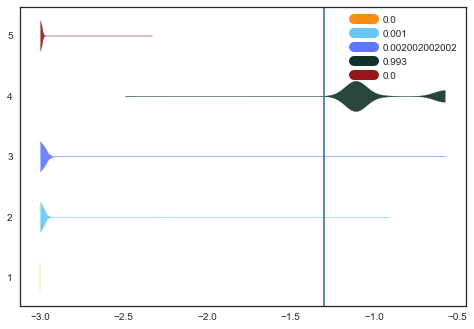

CLL-CRC-0002
CLL-CRC-0003
CLL-CRC-0004
0 1000
1 1000
2 1000
3 1000


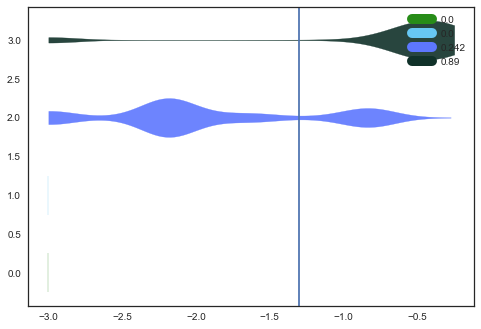

CLL-CRC-0005
0 998
1 1000
2 1000
4 1000
6 18


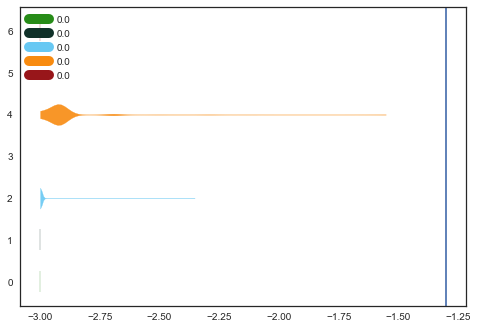

CLL-CRC-0006
CLL-CRC-0007
CLL-CRC-0008
CLL-CRC-0009
CLL-CRC-0010
CLL-CRC-0011
CLL-CRC-0012
CLL-CRC-0013
CLL-CRC-0014
CLL-CRC-0016
CLL-CRC-0017
CLL-CRC-0018
0 1000
1 1000


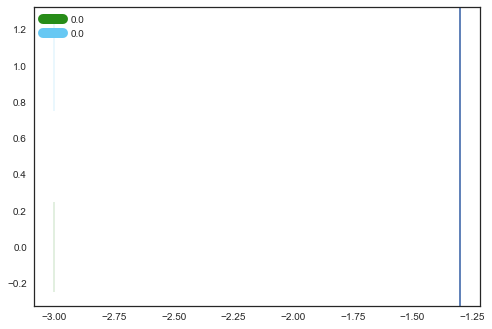

CLL-CRC-0019
0 1000
1 1000
2 1000
3 1000


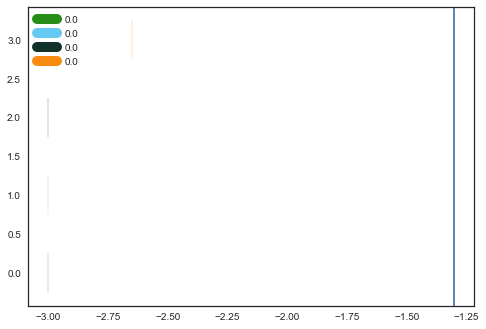

CLL-CRC-0020
CLL-CRC-0021


In [31]:
out_tsv=open("CLL-Kipps-p_vals_Mar28_2018_logexp.tsv","w")
out_tsv.write("indiv\tclust\told_gr\tGR_gr_Parent\n")
for indiv,res in sorted(R.items()):
    print indiv
    d=D[indiv]
    
    c_log,trees_by_edge,cluster_rates,cluster_rates_diff,cluster_line_fit_min_lik,times,wbc= res
    clusters={}
    if indiv not in ["CLL-CRC-0001","CLL-CRC-0004","CLL-CRC-0005","CLL-CRC-0018","CLL-CRC-0019"]:continue
    colors=[x for x in tableau40]
    for col_new,col_old in d.items():
        colors[int(col_new)]=tableau40[int(col_old)]

    phylo_cmap=mcolors.ListedColormap(colors)

    for cluster_idx,values in E_[indiv].items():
        if len(values) == 0:continue
        print cluster_idx,len(values)
        vres=plt.violinplot(np.log10(np.clip(values,0.001,1)),positions=[cluster_idx],vert=False,showextrema=False,bw_method=0.25)
        
        #vres=plt.violinplot(np.array(E[indiv][cluster_idx]),positions=[cluster_idx],vert=False,showextrema=False,bw_method=0.8)
        b=vres["bodies"][0]
        
        plt.plot([],[],linewidth=10,color=[x/255. for x in phylo_cmap.colors[cluster_idx]],label=str(sum(np.array(values)>0.05)/float(len(values))))
        b.set_color([x/255. for x in phylo_cmap.colors[cluster_idx]])
        b.set_alpha(0.9)

    plt.axvline(np.log10(0.05))
    plt.legend()
    plt.show()
        
        


In [36]:
c_log,trees_by_edge,cluster_rates,cluster_rates_diff,cluster_line_fit_min_lik,wbc,times = R["CLL-CRC-0017"]

In [41]:
get_high_low_hat(cluster_rates[2][100:])

TypeError: get_high_low_hat() takes at least 2 arguments (1 given)

CLL-CRC-0005
frozenset([(0, 1), (1, 3), (4, 6), (2, 4), (0, 2), (3, 5)])
. . . . . . .

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:262: RuntimeWarning: divide by zero encountered in log


 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

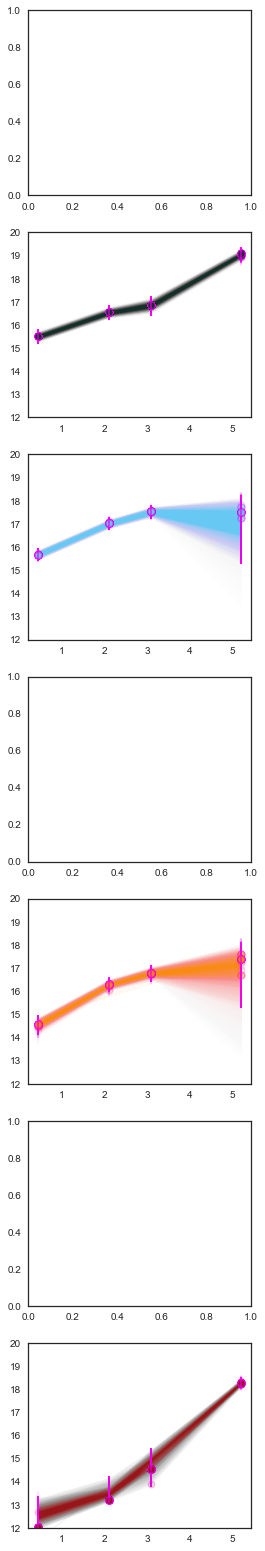

In [28]:
def line_fit_err(x):
        slope,intercept=x

        y_domain=[np.log(grid*wbc[tp_idx]+1e-40) for tp_idx in range(len_pre_tp)] #[np.log((grid-transformation[tp_idx])*wbc[tp_idx]+1e-40) for tp_idx in range(len_pre_tp)]
        y_weights=[adj_dens[tp_idx][c_idx] for tp_idx in range(len_pre_tp)]
                
        line_y_vals=slope*fb_x_vals+intercept

        selected_weight=[
            min(
                sum(y_weights[tp_idx][:min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100)+1]),
                sum(y_weights[tp_idx][min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100):])
            ) if min(y_domain[tp_idx]) <= line_y_vals[tp_idx] <= max(y_domain[tp_idx]) else 0
                for tp_idx in points]
        
        return -min(selected_weight)
    
def line_fit_err_w_bounds(x):
        

    slope,intercept=x

    y_domain=[np.log(grid*(wbc[tp_idx])+1e-40) for tp_idx in range(len_pre_tp)] #[np.log((grid-transformation[tp_idx])*wbc[tp_idx]+1e-40) for tp_idx in range(len_pre_tp)]
    y_weights=[adj_dens[tp_idx][c_idx] for tp_idx in range(len_pre_tp)]

    line_y_vals=slope*fb_x_vals+intercept

    selected_weight=[
        min(
            sum(y_weights[tp_idx][:min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100)+1]),
            sum(y_weights[tp_idx][min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100):])
        ) if isbetween(np.exp(line_y_vals[tp_idx]),np.exp(min(y_domain[tp_idx])), np.exp(max(y_domain[tp_idx])),err_pt[tp_idx]) else 0
            for tp_idx in points]

    return -min(selected_weight)

def isbetween(x,a,b,e=0):
    if (a <= x <= b) or (a <= x+e <=b) or (a <= x-e <=b) or (e > abs(a-b)):
        return True
    else:
        return False
    
def line_fit_pval(x):
        slope,intercept=x

        y_domain=[np.log(grid*wbc[tp_idx]+1e-40) for tp_idx in range(len_pre_tp)] #[np.log((grid-transformation[tp_idx])*wbc[tp_idx]+1e-40) for tp_idx in range(len_pre_tp)]
        y_weights=[adj_dens[tp_idx][c_idx] for tp_idx in range(len_pre_tp)]
        
        line_y_vals=slope*fb_x_vals+intercept

        selected_weight=[
            min(
                sum(y_weights[tp_idx][:min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100)+1]),
                sum(y_weights[tp_idx][min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100):])
            ) if min(y_domain[tp_idx]) <= line_y_vals[tp_idx] <= max(y_domain[tp_idx]) else 0
                for tp_idx in points]

        return min(selected_weight)

from scipy.stats import linregress



grid=np.linspace(0,1,101)


import collections
E_={}
for indiv,res in sorted(R.items()):
    if indiv not in ["CLL-CRC-0005"]:continue # ["CLL-CRC-0001","CLL-CRC-0004","CLL-CRC-0005","CLL-CRC-0018","CLL-CRC-0019"]:continue #

    print indiv
    
    
    d=D[indiv]
    colors=[x for x in tableau40]
    for col_new,col_old in d.items():
        colors[int(col_new)]=tableau40[int(col_old)]

    phylo_cmap=mcolors.ListedColormap(colors)

    c_log,trees_by_edge,cluster_rates,cluster_rates_diff,cluster_line_fit_min_lik,wbc,times = res

    clusters={}
    tree,_=sorted(trees_by_edge.items(),key=lambda x:len(x[1]),reverse=True)[0]
    print tree
    #if indiv == "CLL-CRC-0005":
    #    tree=frozenset([(0, 1),(0, 2)])
    #print tree
    
    ### PLEASE RE-DO THIS AS A DICTIONARY 
    
    def _sample_from_rates(params,times):
        if len(params) > 2:
            P=np.random.random()*(params[1][1]-params[1][0])+params[1][0]
            R=np.random.random()*(params[2][1]-params[2][0])+params[2][0]

            K=np.random.random()*(params[0][1]-params[0][0])+params[0][0]
            return (K/(1+((K-P)/P)*np.exp(-R*np.array(times))))*10**9/1000.
        else:
            P=np.random.random()*(params[0][1]-params[0][0])+params[0][0]
            R=np.random.random()*(params[1][1]-params[1][0])+params[1][0]

            return (P*np.exp(R*np.array(times)))*10**9/1000.
    def _calc_rates(params,times):
        if len(params) > 2:
            P=params[1]
            R=params[2]

            K=params[0]
            return (K/(1+((K-P)/P)*np.exp(-R*np.array(times))))*10**9/1000.
        else:
            P=params[0]
            R=params[1]

            return (P*np.exp(R*np.array(times)))*10**9/1000.
    growth_pts={
                 "CLL-CRC-0001":[7.92,0.61],
                 "CLL-CRC-0004":[94.87,24.54,0.42],
                 "CLL-CRC-0005":[11.01,0.71],
                 "CLL-CRC-0018":[171.9,4.49,0.8],
                 "CLL-CRC-0019":[148.48,16.16,0.43]
                }
    
    growth_fits={
                 "CLL-CRC-0001":[(2.59, 13.24),(0.48, 0.74)],
                 "CLL-CRC-0004":[(77.87, 111.86),(18.98, 30.10),(0.25, 0.58)],
                 "CLL-CRC-0005":[(7.16, 14.85),(0.63, 0.78)],
                 "CLL-CRC-0018":[(165.32, 178.48),(1.13, 7.84),(0.62, 0.97)],
                 "CLL-CRC-0019":[(134.66, 162.30),(-1.71, 34.02),(0.21, 0.65)]
                }

        
    try: n_pre_tp=list(np.sign(times)).index(-1)
    except: n_pre_tp=len(times)
    len_pre_tp=n_pre_tp
        
    fb_x_vals=np.array(times[:len_pre_tp])  

    tree=nx.DiGraph(list(tree))
    
    log_exp_pval={x:{} for x in tree.nodes()}
    
    
    n_clusters=len(c_log[0][0])
    n_timepoints=len(c_log[0])
    
    
    
    
    
    
    edges=tree.edges()
        
    #print edges
    parents=[None]*n_clusters     #make zero cluster child of clonal cluster. 
    siblings=[None]*n_clusters  #which forces it further to zero
    children=[None]*n_clusters

    for edge in edges:
        parents[edge[1]]=edge[0]

    parents=np.array(parents)

    #for cluster in bl_clusters:
    #    parents[cluster]=None

    for cluster_idx,parent in enumerate(parents):
        if parent != None and not np.isnan(parent):
            if children[parent] == None:children[parent]=[]
            children[parent].append(cluster_idx)

    #for cluster in rm_clusters:
    #    parents[cluster]=np.nan

    for cluster,n_shared in collections.Counter(parents).items():
        if n_shared > 1:
            shared_clusters = np.where(parents==cluster)[0]
            for shared_cluster in shared_clusters:
                siblings[shared_cluster]=list(shared_clusters[shared_clusters != shared_cluster])
    

    plt.figure(figsize=(4,32))
    
    fit_params={x:[] for x in tree.nodes()}
    
    for iter_ in  c_log[100::100]:
        wbc=_calc_rates(growth_pts[indiv],times)
        err_pt=[np.mean(np.array(wbc)-np.array(res[5])) for x in wbc]
        cluster_densities=iter_
        
        adj_dens=get_phylo_adj_ccf_dist(iter_,tree)
        print ".",
        for cluster in tree.nodes():
            if type(cluster) != int :continue
            c_idx=cluster

            potential_skip=0
            while np.argmax(adj_dens[potential_skip][c_idx]) < 1:
                potential_skip+=1
                if potential_skip == len_pre_tp:break#return 0
    
            if potential_skip == len_pre_tp:continue
            
            points=range(len_pre_tp)[potential_skip:]
            
            if len(points) < 3:continue #don't test < 2 
            
            fit_res=linregress(fb_x_vals[points],((np.log(np.argmax(adj_dens,axis=2)/100.+0.001).T[cluster])+np.log(wbc))[points])
            
            
            try:
                o_res=scipy.optimize.minimize(line_fit_err_w_bounds,[fit_res.slope,fit_res.intercept],method="Nelder-Mead")
                slope_f,intercept_f=o_res.x
                
                p_val_cut=1 + line_fit_err_w_bounds([slope_f,intercept_f])
                if not o_res.success:
                    continue
                fit_params[cluster].append([slope_f,intercept_f])
            except ValueError:
                raise
                continue
             
            #pass_=0.
            #for tp_idx in points:
            #    tp_dist=adj_dens[tp_idx][c_idx]
            #    high,low,hat=get_high_low_hat(tp_dist,grid)
            #    #plt.plot([fb_x_vals[tp_idx],fb_x_vals[tp_idx]],[np.log(high*wbc[tp_idx]),np.log(low*wbc[tp_idx])],alpha=0.05,color="gray")
            #    if not isbetween(np.exp(fb_x_vals[tp_idx]*slope_f+intercept_f),low*wbc[tp_idx],high*wbc[tp_idx],0*err_pt[tp_idx]):
            #        pass_=1. 
            #        break
            #p_val_cut=pass_
            #if len(points) not in log_exp_pval[cluster]:log_exp_pval[cluster][len(points)]=[]
            #log_exp_pval[cluster][len(points)].append(pass_)
            if c_idx == 0:continue
            #if c_idx > 4: continue
            if np.random.random() < 1.1:#0.01:
                plt.subplot(8,1,c_idx+1)
                plt.plot(fb_x_vals[points],(np.log(np.argmax(adj_dens,axis=2)/100.+0.001).T[c_idx]+np.log(wbc))[points],"o",alpha=0.1,color=phylo_cmap.colors[cluster],markeredgecolor="magenta",markeredgewidth=1)#"magenta" if (1-p_val_cut) > 0.05 else "black")

                if (1-p_val_cut) > 0.05:

                    plt.plot(fb_x_vals,fb_x_vals*slope_f+intercept_f,"-",alpha=0.05,color=phylo_cmap.colors[cluster])#"magenta" if (1-p_val_cut) > 0.05 else "black")#phylo_cmap.colors[cluster])

                    
                for conf in [.95,.90,.85]:

                    highs=[]
                    lows=[]
                    for tp_idx,tp in enumerate(adj_dens[:len_pre_tp]):
                        
                        tp_dist=tp[c_idx]


                        high,low,hat=get_high_low_hat(tp_dist,grid,cut=conf)


                        highs.append(np.log(max(high,0.001)*wbc[tp_idx]))
                        lows.append(np.log(max(low,0.001)*wbc[tp_idx]))


                        plt.plot([fb_x_vals[tp_idx],fb_x_vals[tp_idx]],[np.log(high*wbc[tp_idx]),np.log(low*wbc[tp_idx])],alpha=0.05,color="magenta" )#phylo_cmap.colors[cluster])#"magenta" if (1-p_val_cut) > 0.05 else "black")
                    #plt.plot(fb_x_vals,lows,color="gray",alpha=0.05)
                    #plt.plot(fb_x_vals,highs,color="gray",alpha=0.05)
                    lows=np.array(lows)
                    highs=np.array(highs)
                    range_=(highs-lows)[points]
                    
                    plt.fill_between(fb_x_vals[points],lows[points]+np.random.random()*range_/2.,highs[points]-np.random.random()*range_/2.,alpha=0.005,color=phylo_cmap.colors[cluster])
                    #plt.fill_between(fb_x_vals,lows2,highs2,alpha=0.005,color=phylo_cmap.colors[cluster])

                #print highs,lows
                if "04" in indiv:plt.ylim(12,18)
                else:plt.ylim(12,20)
            if len(points) not in log_exp_pval[cluster]:log_exp_pval[cluster][len(points)]=[]
            log_exp_pval[cluster][len(points)].append(p_val_cut)


        
    for cluster in tree.nodes():
        if type(cluster) != int :continue
        plt.subplot(8,1,cluster+1)
        try:
            slope,intercept=np.median(fit_params[cluster],axis=0)
        except:
            continue
        #plt.plot(fb_x_vals,fb_x_vals*slope+intercept,color=phylo_cmap.colors[cluster],linewidth=4,solid_capstyle="butt")

        
        
    plt.savefig(indiv+"_fig5_smooth_lines.pdf")
    plt.savefig(indiv+"_fig5_smooth_lines.png")
    plt.show()
        
        
        #for c_idx in tree.nodes():
        #    if type(c_idx) != int :continue
        #    fit_res=linregress(fb_x_vals,((np.log(np.argmax(adj_dens,axis=2)/100.+0.001).T[c_idx])+np.log(wbc))[:len_pre_tp])
        #    slope_f,intercept_f=scipy.optimize.minimize(line_fit_err,[fit_res.slope,fit_res.intercept],method="Nelder-Mead").x
            
            
    print ""
    E_[indiv]=log_exp_pval.copy()



In [7]:
import numpy as np

In [185]:
wbc

array([  50.92494298,   69.66440225,  132.61859506,  153.23215966,
        156.60432245,  158.27016909])

CLL-CRC-0005
frozenset([(0, 1), (1, 3), (4, 6), (2, 4), (0, 2), (3, 5)])
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:262: RuntimeWarning: divide by zero encountered in log


 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

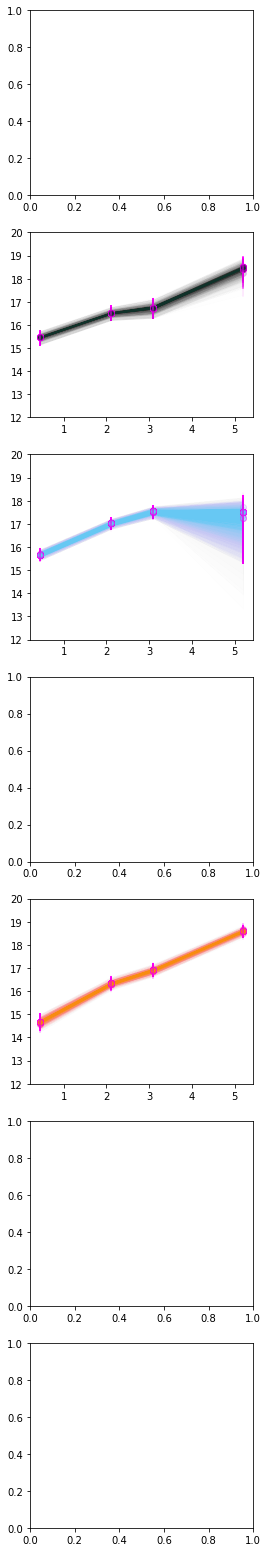

In [77]:
def line_fit_err(x):
        slope,intercept=x

        y_domain=[np.log(grid*wbc[tp_idx]+1e-40) for tp_idx in range(len_pre_tp)] #[np.log((grid-transformation[tp_idx])*wbc[tp_idx]+1e-40) for tp_idx in range(len_pre_tp)]
        y_weights=[adj_dens[tp_idx][c_idx] for tp_idx in range(len_pre_tp)]
                
        line_y_vals=slope*fb_x_vals+intercept

        selected_weight=[
            min(
                sum(y_weights[tp_idx][:min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100)+1]),
                sum(y_weights[tp_idx][min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100):])
            ) if min(y_domain[tp_idx]) <= line_y_vals[tp_idx] <= max(y_domain[tp_idx]) else 0
                for tp_idx in points]
        
        return -min(selected_weight)
    
def line_fit_err_w_bounds(x):
        

    slope,intercept=x

    y_domain=[np.log(grid*(wbc[tp_idx])+1e-40) for tp_idx in range(len_pre_tp)] #[np.log((grid-transformation[tp_idx])*wbc[tp_idx]+1e-40) for tp_idx in range(len_pre_tp)]
    y_weights=[adj_dens[tp_idx][c_idx] for tp_idx in range(len_pre_tp)]

    line_y_vals=slope*fb_x_vals+intercept

    selected_weight=[
        min(
            sum(y_weights[tp_idx][:min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100)+1]),
            sum(y_weights[tp_idx][min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100):])
        ) if isbetween(np.exp(line_y_vals[tp_idx]),np.exp(min(y_domain[tp_idx])), np.exp(max(y_domain[tp_idx])),err_pt[tp_idx]) else 0
            for tp_idx in points]

    return -min(selected_weight)

def isbetween(x,a,b,e=0):
    if (a <= x <= b) or (a <= x+e <=b) or (a <= x-e <=b) or (e > abs(a-b)):
        return True
    else:
        return False
    
def line_fit_pval(x):
        slope,intercept=x

        y_domain=[np.log(grid*wbc[tp_idx]+1e-40) for tp_idx in range(len_pre_tp)] #[np.log((grid-transformation[tp_idx])*wbc[tp_idx]+1e-40) for tp_idx in range(len_pre_tp)]
        y_weights=[adj_dens[tp_idx][c_idx] for tp_idx in range(len_pre_tp)]
        
        line_y_vals=slope*fb_x_vals+intercept

        selected_weight=[
            min(
                sum(y_weights[tp_idx][:min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100)+1]),
                sum(y_weights[tp_idx][min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100):])
            ) if min(y_domain[tp_idx]) <= line_y_vals[tp_idx] <= max(y_domain[tp_idx]) else 0
                for tp_idx in points]

        return min(selected_weight)

from scipy.stats import linregress



grid=np.linspace(0,1,101)


import collections
E_={}
for indiv,res in sorted(R.items()):
    if indiv not in ["CLL-CRC-0005"]:continue #

    print indiv
    
    
    d=D[indiv]
    colors=[x for x in tableau40]
    for col_new,col_old in d.items():
        colors[int(col_new)]=tableau40[int(col_old)]

    phylo_cmap=mcolors.ListedColormap(colors)

    c_log,trees_by_edge,cluster_rates,cluster_rates_diff,cluster_line_fit_min_lik,wbc,times = res

    clusters={}
    tree,_=sorted(trees_by_edge.items(),key=lambda x:len(x[1]),reverse=True)[0]
    print tree
    if indiv == "CLL-CRC-0005":
        tree=frozenset([(0, 1), (0, 2), (1, 3), (2, 4), (3, 5), (1, 6)])
    #print tree
    
    ### PLEASE RE-DO THIS AS A DICTIONARY 
    
    def _sample_from_rates(params,times):
        if len(params) > 2:
            P=np.random.random()*(params[1][1]-params[1][0])+params[1][0]
            R=np.random.random()*(params[2][1]-params[2][0])+params[2][0]

            K=np.random.random()*(params[0][1]-params[0][0])+params[0][0]
            return (K/(1+((K-P)/P)*np.exp(-R*np.array(times))))*10**9/1000.
        else:
            P=np.random.random()*(params[0][1]-params[0][0])+params[0][0]
            R=np.random.random()*(params[1][1]-params[1][0])+params[1][0]

            return (P*np.exp(R*np.array(times)))*10**9/1000.
    def _calc_rates(params,times):
        if len(params) > 2:
            P=params[1]
            R=params[2]

            K=params[0]
            return (K/(1+((K-P)/P)*np.exp(-R*np.array(times))))*10**9/1000.
        else:
            P=params[0]
            R=params[1]

            return (P*np.exp(R*np.array(times)))*10**9/1000.
    growth_pts={
                 "CLL-CRC-0001":[7.92,0.61],
                 "CLL-CRC-0004":[94.87,24.54,0.42],
                 "CLL-CRC-0005":[11.01,0.71],
                 "CLL-CRC-0018":[171.9,4.49,0.8],
                 "CLL-CRC-0019":[148.48,16.16,0.43]
                }
    
    growth_fits={
                 "CLL-CRC-0001":[(2.59, 13.24),(0.48, 0.74)],
                 "CLL-CRC-0004":[(77.87, 111.86),(18.98, 30.10),(0.25, 0.58)],
                 "CLL-CRC-0005":[(7.16, 14.85),(0.63, 0.78)],
                 "CLL-CRC-0018":[(165.32, 178.48),(1.13, 7.84),(0.62, 0.97)],
                 "CLL-CRC-0019":[(134.66, 162.30),(-1.71, 34.02),(0.21, 0.65)]
                }

        
    try: n_pre_tp=list(np.sign(times)).index(-1)
    except: n_pre_tp=len(times)
    len_pre_tp=n_pre_tp
        
    fb_x_vals=np.array(times[:len_pre_tp])  

    tree=nx.DiGraph(list(tree))
    
    log_exp_pval={x:{} for x in tree.nodes()}
    
    
    n_clusters=len(c_log[0][0])
    n_timepoints=len(c_log[0])
    
    
    
    
    
    
    edges=tree.edges()
        
    #print edges
    parents=[None]*n_clusters     #make zero cluster child of clonal cluster. 
    siblings=[None]*n_clusters  #which forces it further to zero
    children=[None]*n_clusters

    for edge in edges:
        parents[edge[1]]=edge[0]

    parents=np.array(parents)

    #for cluster in bl_clusters:
    #    parents[cluster]=None

    for cluster_idx,parent in enumerate(parents):
        if parent != None and not np.isnan(parent):
            if children[parent] == None:children[parent]=[]
            children[parent].append(cluster_idx)

    #for cluster in rm_clusters:
    #    parents[cluster]=np.nan

    for cluster,n_shared in collections.Counter(parents).items():
        if n_shared > 1:
            shared_clusters = np.where(parents==cluster)[0]
            for shared_cluster in shared_clusters:
                siblings[shared_cluster]=list(shared_clusters[shared_clusters != shared_cluster])
    

    plt.figure(figsize=(4,32))
    
    fit_params={x:[] for x in tree.nodes()}
    
    for iter_ in  c_log[100:]:
        wbc=_calc_rates(growth_pts[indiv],times)
        err_pt=[np.mean(np.array(wbc)-np.array(res[5])) for x in wbc]
        cluster_densities=iter_
        
        adj_dens=get_phylo_adj_ccf_dist(iter_,tree)
        
        print ".",
        for cluster in tree.nodes():
            if type(cluster) != int :continue
            c_idx=cluster

            potential_skip=0
            while np.argmax(adj_dens[potential_skip][c_idx]) < 1:
                potential_skip+=1
                if potential_skip == len_pre_tp:break#return 0
    
            if potential_skip == len_pre_tp:continue
            
            points=range(len_pre_tp)[potential_skip:]
            
            if len(points) < 3:continue #don't test < 2 
            
            fit_res=linregress(fb_x_vals[points],((np.log(np.argmax(adj_dens,axis=2)/100.+0.001).T[cluster])+np.log(wbc))[points])
            
            
            try:
                o_res=scipy.optimize.minimize(line_fit_err_w_bounds,[fit_res.slope,fit_res.intercept],method="Nelder-Mead")
                slope_f,intercept_f=o_res.x
                
                p_val_cut=1 + line_fit_err_w_bounds([slope_f,intercept_f])
                if not o_res.success:
                    continue
                fit_params[cluster].append([slope_f,intercept_f])
            except ValueError:
                raise
                continue
             
            #pass_=0.
            #for tp_idx in points:
            #    tp_dist=adj_dens[tp_idx][c_idx]
            #    high,low,hat=get_high_low_hat(tp_dist,grid)
            #    #plt.plot([fb_x_vals[tp_idx],fb_x_vals[tp_idx]],[np.log(high*wbc[tp_idx]),np.log(low*wbc[tp_idx])],alpha=0.05,color="gray")
            #    if not isbetween(np.exp(fb_x_vals[tp_idx]*slope_f+intercept_f),low*wbc[tp_idx],high*wbc[tp_idx],0*err_pt[tp_idx]):
            #        pass_=1. 
            #        break
            #p_val_cut=pass_
            #if len(points) not in log_exp_pval[cluster]:log_exp_pval[cluster][len(points)]=[]
            #log_exp_pval[cluster][len(points)].append(pass_)
            if c_idx == 0:continue
            if c_idx > 4: continue
            if np.random.random() < 0.01:
                plt.subplot(8,1,c_idx+1)
                plt.plot(fb_x_vals[points],(np.log(np.argmax(adj_dens,axis=2)/100.+0.001).T[c_idx]+np.log(wbc))[points],"o",alpha=0.1,color=phylo_cmap.colors[cluster],markeredgecolor="magenta",markeredgewidth=1)#"magenta" if (1-p_val_cut) > 0.05 else "black")

                #if (1-p_val_cut) > 0.05:

                #    plt.plot(fb_x_vals,fb_x_vals*slope_f+intercept_f,"-",alpha=0.05,color=phylo_cmap.colors[cluster])#"magenta" if (1-p_val_cut) > 0.05 else "black")#phylo_cmap.colors[cluster])

                    
                for conf in [.95,.75,.25]:

                    highs=[]
                    lows=[]
                    for tp_idx,tp in enumerate(adj_dens[:len_pre_tp]):
                        tp_dist=tp[c_idx]


                        high,low,hat=get_high_low_hat(tp_dist,grid,cut=conf)


                        highs.append(np.log(max(high,0.001)*wbc[tp_idx]))
                        lows.append(np.log(max(low,0.001)*wbc[tp_idx]))


                        plt.plot([fb_x_vals[tp_idx],fb_x_vals[tp_idx]],[np.log(high*wbc[tp_idx]),np.log(low*wbc[tp_idx])],alpha=0.05,color="magenta" )#phylo_cmap.colors[cluster])#"magenta" if (1-p_val_cut) > 0.05 else "black")
                    #plt.plot(fb_x_vals,lows,color="gray",alpha=0.05)
                    #plt.plot(fb_x_vals,highs,color="gray",alpha=0.05)
                    lows=np.array(lows)
                    highs=np.array(highs)
                    range_=highs-lows
                    
                    plt.fill_between(fb_x_vals,lows+np.random.random()*range_/2.,highs-np.random.random()*range_/2.,alpha=0.005,color=phylo_cmap.colors[cluster])
                    #plt.fill_between(fb_x_vals,lows2,highs2,alpha=0.005,color=phylo_cmap.colors[cluster])

                #print highs,lows
                if "04" in indiv:plt.ylim(12,18)
                else:plt.ylim(12,20)
            if len(points) not in log_exp_pval[cluster]:log_exp_pval[cluster][len(points)]=[]
            log_exp_pval[cluster][len(points)].append(p_val_cut)


        
    for cluster in tree.nodes():
        if type(cluster) != int :continue
        plt.subplot(8,1,cluster+1)
        try:
            slope,intercept=np.median(fit_params[cluster],axis=0)
        except:
            continue
        #plt.plot(fb_x_vals,fb_x_vals*slope+intercept,color=phylo_cmap.colors[cluster],linewidth=4,solid_capstyle="butt")

        
        
    plt.savefig(indiv+"_fig5_smooth_lines.pdf")
    plt.savefig(indiv+"_fig5_smooth_lines.png")
    plt.show()
        
        
        #for c_idx in tree.nodes():
        #    if type(c_idx) != int :continue
        #    fit_res=linregress(fb_x_vals,((np.log(np.argmax(adj_dens,axis=2)/100.+0.001).T[c_idx])+np.log(wbc))[:len_pre_tp])
        #    slope_f,intercept_f=scipy.optimize.minimize(line_fit_err,[fit_res.slope,fit_res.intercept],method="Nelder-Mead").x
            
            
    print ""
    E_[indiv]=log_exp_pval.copy()



In [58]:
d=D["CLL-CRC-0005"]
colors=[x for x in tableau40]
for col_new,col_old in d.items():
    colors[int(col_new)]=tableau40[int(col_old)]

phylo_cmap=mcolors.ListedColormap(colors)


(0, 100)

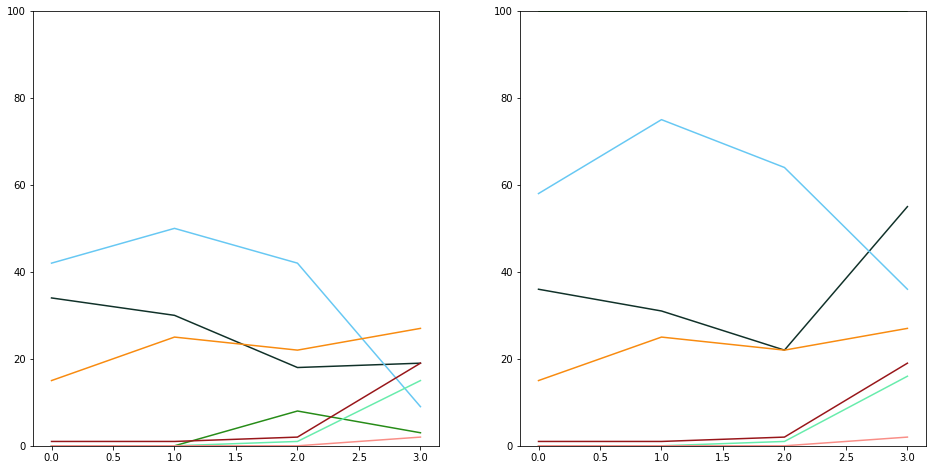

In [73]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
for c_idx,x in enumerate(np.argmax(adj_dens,axis=2).T):
    plt.plot(x[points],color=phylo_cmap.colors[c_idx])
plt.ylim(0,100)
plt.subplot(1,2,2)

for c_idx,x in enumerate(np.argmax(iter_,axis=2).T):
    plt.plot(x[points],color=phylo_cmap.colors[c_idx])
plt.ylim(0,100)

In [69]:
D={ 'CLL-CRC-0005': {'0': '0',
  '1': '2',
  '2': '1',
  '3': '6',
  '4': '3',
  '5': '7',
  '6': '5'},}



In [70]:
tree.edges()

[(0, 1), (0, 2), (1, 3), (2, 4), (3, 5), (3, 6)]

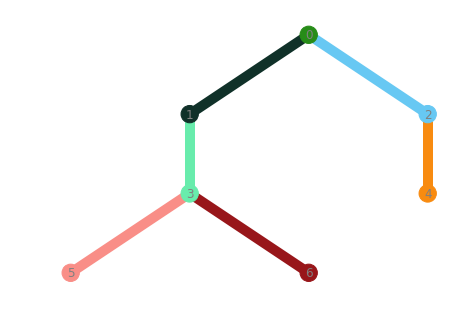

In [71]:
plot_nx(tree.edges(),"dot",tableau40=phylo_cmap.colors)

In [133]:
for  x in E_["CLL-CRC-0004"][4].items():
    print x[0],len(x[1])

KeyError: 4

In [103]:
for x in log_exp_pval.items():
    if 4 not in x[1]:continue
    if len(x[1][4]) < 2:continue
    print d[str(x[0])],1-float(sum(1-np.array(x[1][4]) < 0.05))/float(len(np.array(x[1][4])))
    print sum(1-np.array(x[1][4]) < 0.05)
 

2 1.0
0
1 0.0
9900
3 1.0
0


KeyError: 4

In [94]:
1+

KeyError: 4

In [108]:
tally=[]

for indiv,res in sorted(R.items()):
    d=D[indiv]
    
    c_log,trees_by_edge,cluster_rates,cluster_rates_diff,cluster_line_fit_min_lik,times,wbc= res
    for c_idx,values in cluster_rates_diff.items():
        tally.append([indiv,d[str(c_idx)],np.nanmedian(values)])

In [112]:
for x in sorted(tally,key=lambda x:x[2],reverse=True):
    print "\t".join([str(y) for y in x])

CLL-CRC-0021	3	1.44244106369
CLL-CRC-0001	4	1.27561470343
CLL-CRC-0013	2	0.90420235537
CLL-CRC-0012	2	0.904185741784
CLL-CRC-0006	4	0.822002324321
CLL-CRC-0005	5	0.714301190266
CLL-CRC-0014	1	0.570204958393
CLL-CRC-0005	4	0.481457212438
CLL-CRC-0004	2	0.434889545312
CLL-CRC-0021	1	0.393195303834
CLL-CRC-0011	1	0.388042017515
CLL-CRC-0009	1	0.340841102608
CLL-CRC-0013	4	0.331042159704
CLL-CRC-0006	3	0.268273895636
CLL-CRC-0019	3	0.229695925963
CLL-CRC-0005	3	0.229107941107
CLL-CRC-0001	2	0.205463912477
CLL-CRC-0007	3	0.163405928059
CLL-CRC-0008	1	0.158577935516
CLL-CRC-0009	4	0.143399091486
CLL-CRC-0020	1	0.118195587135
CLL-CRC-0003	2	0.101404085685
CLL-CRC-0003	1	0.0756907505453
CLL-CRC-0004	4	0.0653660271433
CLL-CRC-0006	2	0.0407399432325
CLL-CRC-0016	2	0.0320781979789
CLL-CRC-0005	2	0.0158014623768
CLL-CRC-0001	0	0.0
CLL-CRC-0002	0	0.0
CLL-CRC-0003	0	0.0
CLL-CRC-0003	3	0.0
CLL-CRC-0004	0	0.0
CLL-CRC-0005	0	0.0
CLL-CRC-0006	0	0.0
CLL-CRC-0007	0	0.0
CLL-CRC-0008	0	0.0
CLL-CRC-0009	0	0.

CLL-CRC-0001
CLL-CRC-0002
CLL-CRC-0003
CLL-CRC-0004
CLL-CRC-0005
1 99
2 99
4 99


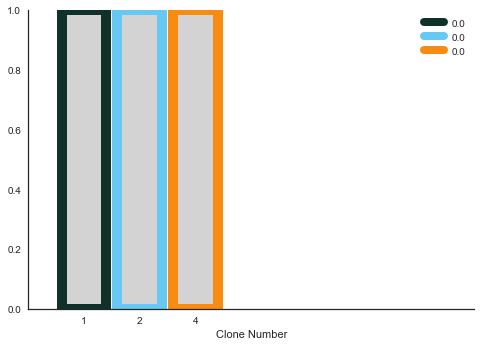

CLL-CRC-0006
CLL-CRC-0007
CLL-CRC-0008
CLL-CRC-0009
CLL-CRC-0010
CLL-CRC-0011
CLL-CRC-0012
CLL-CRC-0013
CLL-CRC-0014
CLL-CRC-0016
CLL-CRC-0017
CLL-CRC-0018
CLL-CRC-0019
1 99
2 99
3 99


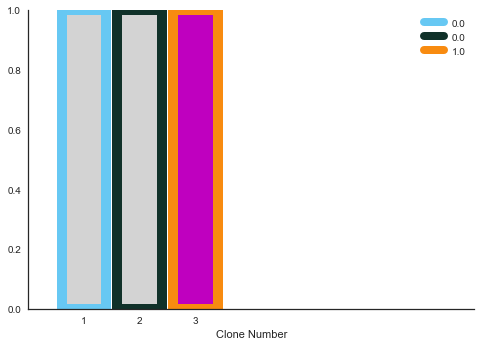

CLL-CRC-0020
CLL-CRC-0021


In [37]:
out_tsv=open("CLL-Kipps-p_vals_Mar28_2018_logexp.tsv","w")
out_tsv.write("indiv\tclust\told_gr\tGR_gr_Parent\n")
for indiv,res in sorted(R.items()):
    print indiv
    d=D[indiv]
    
    c_log,trees_by_edge,cluster_rates,cluster_rates_diff,cluster_line_fit_min_lik,times,wbc= res
    clusters={}
    if indiv not in ["CLL-CRC-0005","CLL-CRC-0019"]:continue
    colors=[x for x in tableau40]
    for col_new,col_old in d.items():
        colors[int(col_new)]=tableau40[int(col_old)]

    phylo_cmap=mcolors.ListedColormap(colors)
    x_ticks_pos=[]
    x_tick_vals=[]
    x_start=1

    for cluster_idx,values in E_[indiv].items():
        if cluster_idx == 0:continue
        if cluster_idx > 4: continue
        
        values=sorted(values.values(),key=lambda x:-len(x))
        if len(values) == 0:continue
        x_ticks_pos.append(x_start)
        x_tick_vals.append(cluster_idx)
        
        
        values=values[0]
        print cluster_idx,len(values)
        values=1-np.array(values)
        #vres=plt.violinplot(np.log10(np.clip(values,0.001,1)),positions=[cluster_idx],vert=False,showextrema=False,bw_method=0.25)
        
        #vres=plt.violinplot(np.array(E[indiv][cluster_idx]),positions=[cluster_idx],vert=False,showextrema=False,bw_method=0.8)
        #b=vres["bodies"][0]
        plt.bar(x_start,1-sum(np.array(values)>0.05)/float(len(values)),color="lightgray",edgecolor=np.array(phylo_cmap.colors[cluster_idx]),lw=10)
        plt.bar(x_start,sum(np.array(values)>0.05)/float(len(values)),color="m",bottom=1-sum(np.array(values)>0.05)/float(len(values)),edgecolor=np.array(phylo_cmap.colors[cluster_idx]),lw=10)
        #plt.bar(cluster_idx,-0.1,color=np.array(phylo_cmap.colors[cluster_idx]),)
        plt.plot([],[],color=phylo_cmap.colors[cluster_idx],label=str(round(sum(np.array(values)>0.05)/float(len(values)),3)),lw=8)
        #b.set_color(phylo_cmap.colors[cluster_idx])
        #b.set_alpha(0.9)
        x_start+=1
    plt.xlim(0,8)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(x_ticks_pos,x_tick_vals)
    plt.xlabel("Clone Number")
    
    #plt.axis("off")
    #plt.ylim(-1,2)
    #plt.axhline(0)
    plt.legend()
    plt.savefig(indiv+"_exp_bars.pdf")
    plt.show()
        
        


/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0001	GR > Parent pval


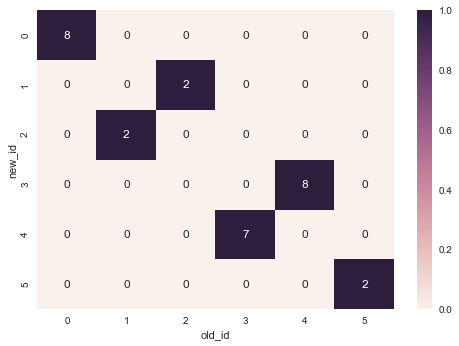

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0001	GR > Parent pval


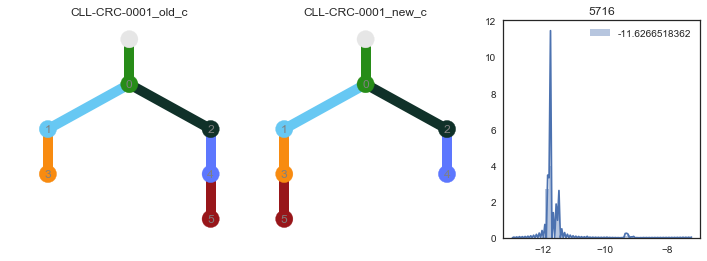

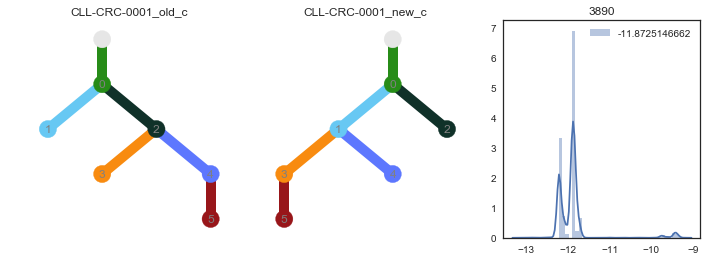

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0001.WGS	GR > Parent pval


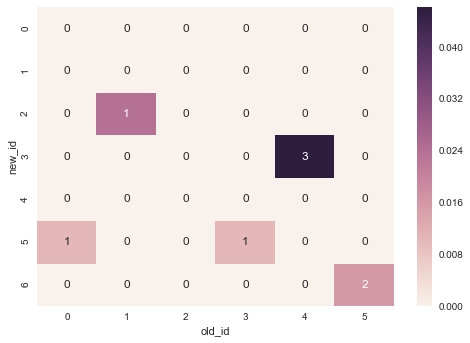

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0001.WGS	GR > Parent pval


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in greater


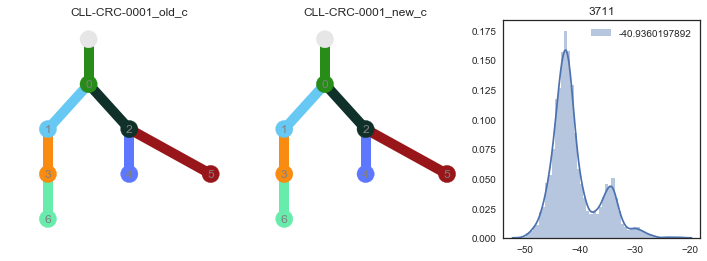

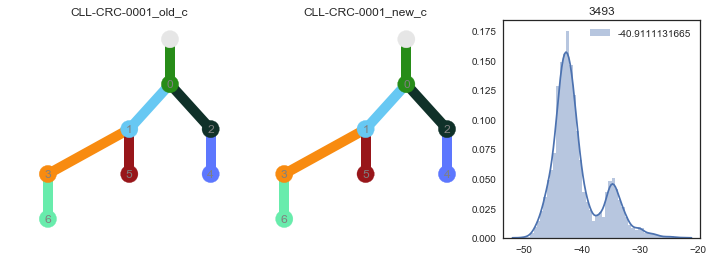

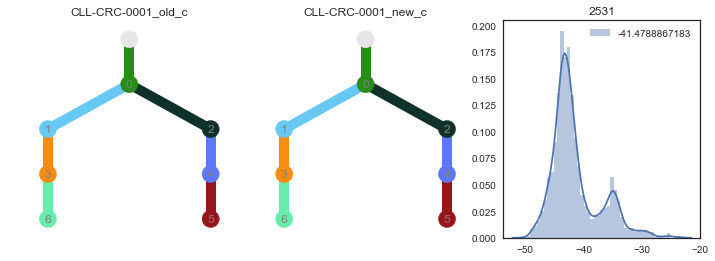

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0002	GR > Parent pval


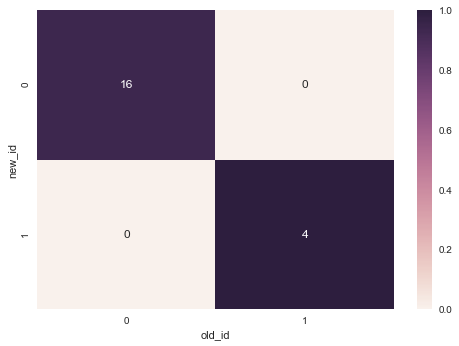

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0002	GR > Parent pval


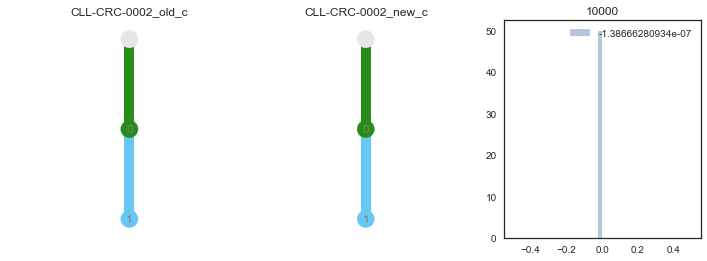

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0003	GR > Parent pval


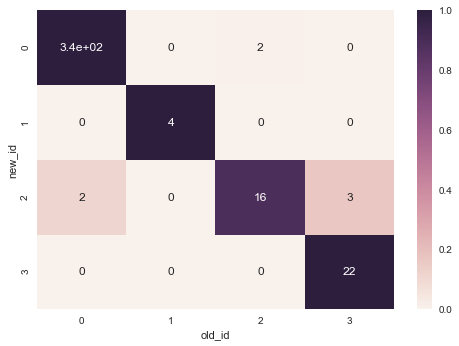

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0003	GR > Parent pval


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in long_scalars


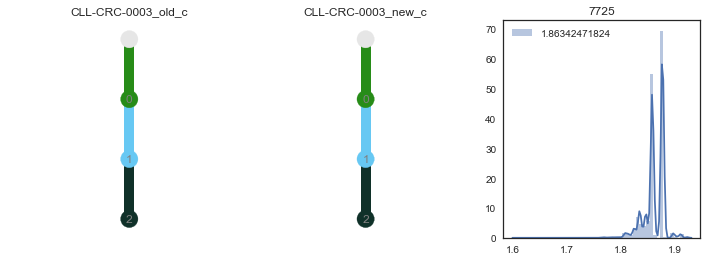

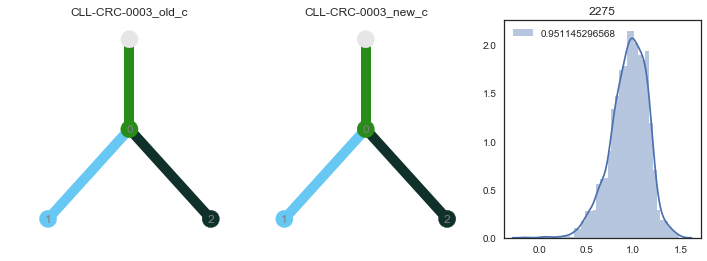

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0004	GR > Parent pval


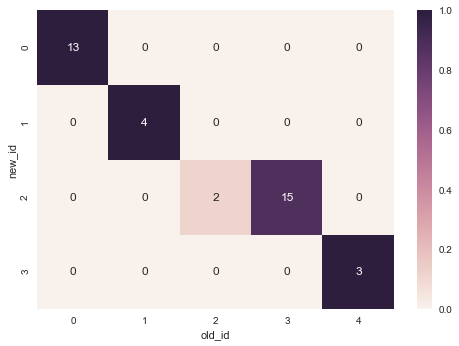

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0004	GR > Parent pval


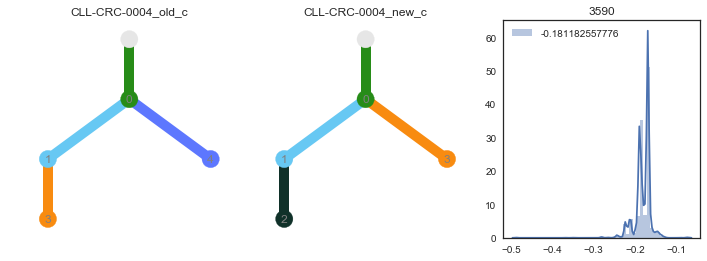

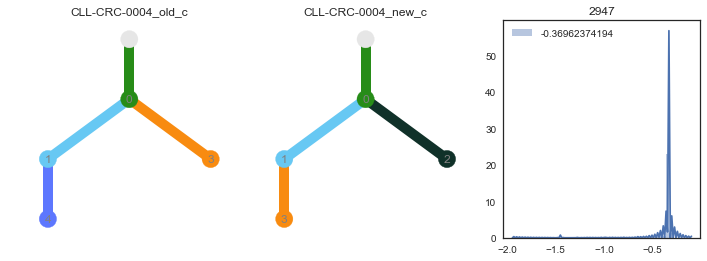

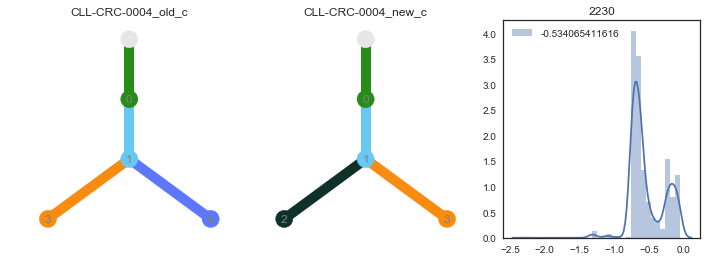

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0004.WGS	GR > Parent pval


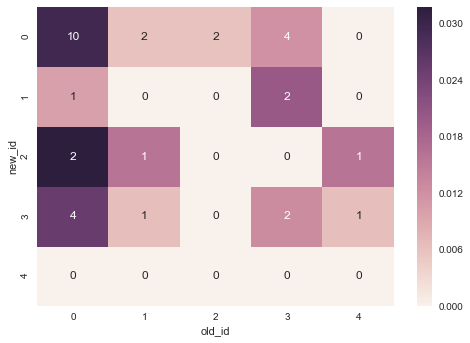

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0004.WGS	GR > Parent pval


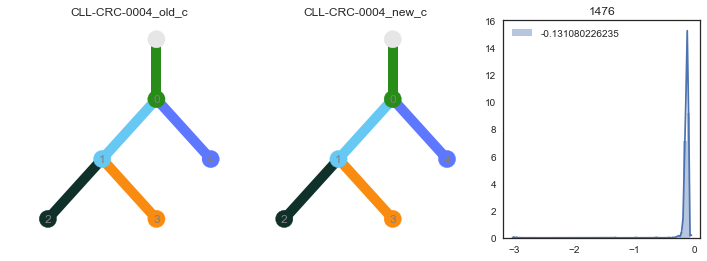

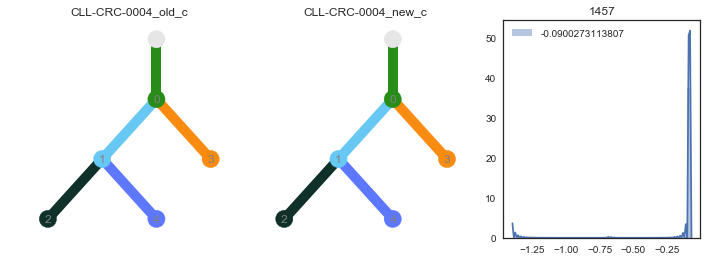

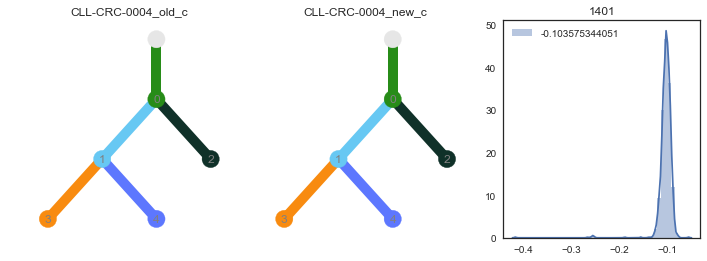

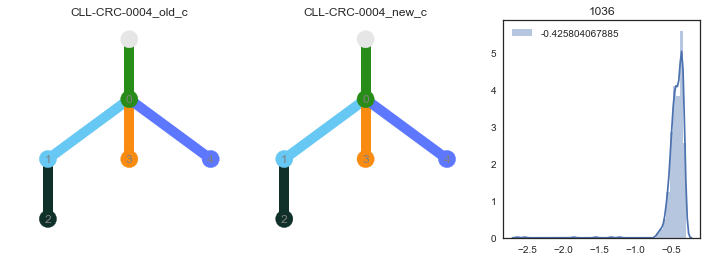

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0005	GR > Parent pval


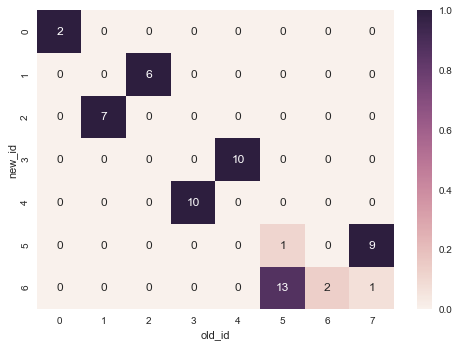

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0005	GR > Parent pval


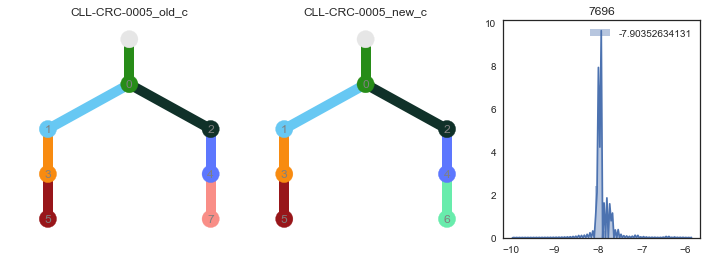

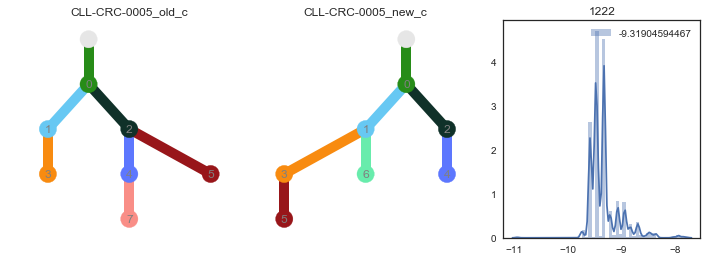

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0006	GR > Parent pval


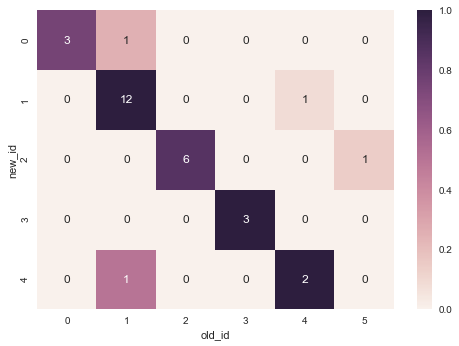

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0006	GR > Parent pval


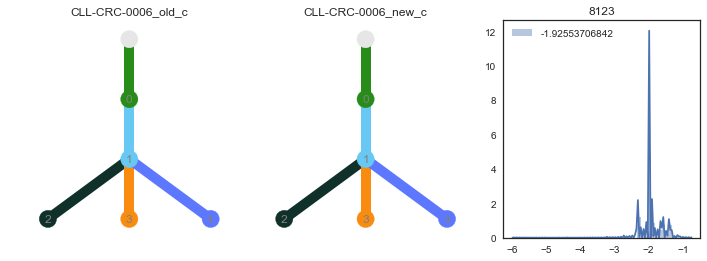

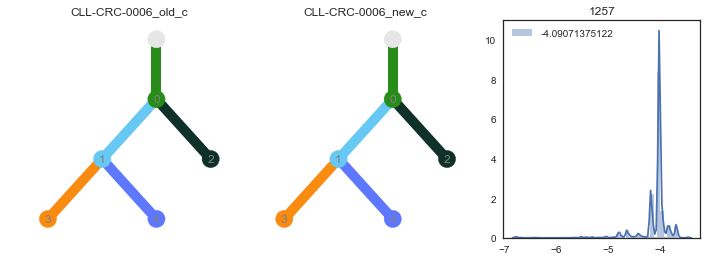

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0006.WGS	GR > Parent pval


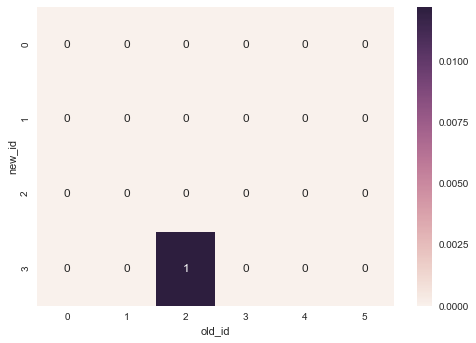

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0006.WGS	GR > Parent pval


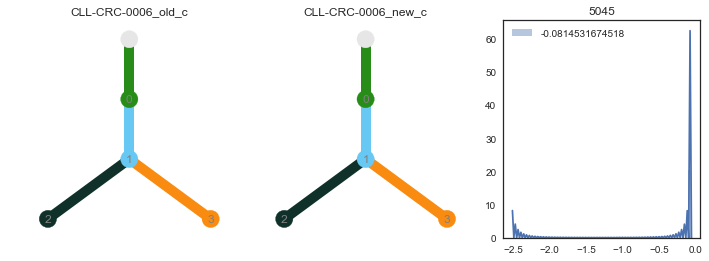

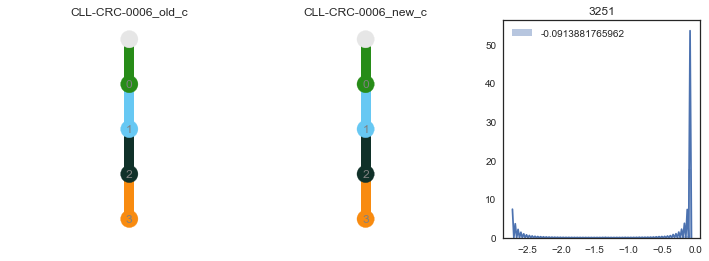

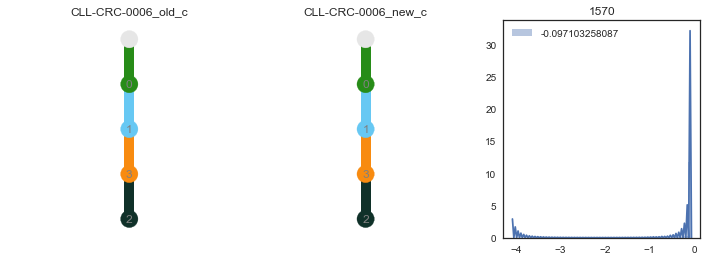

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0007	GR > Parent pval


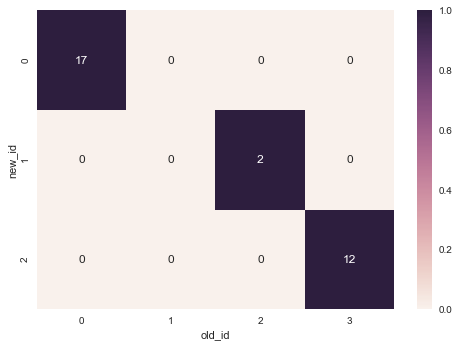

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0007	GR > Parent pval


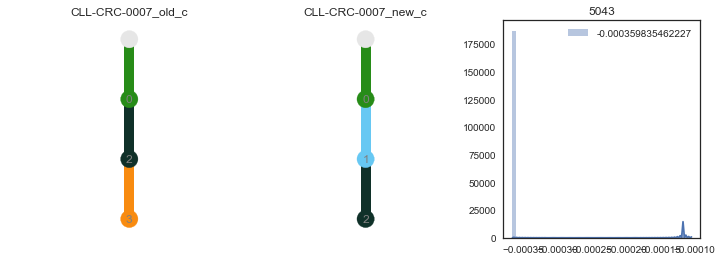

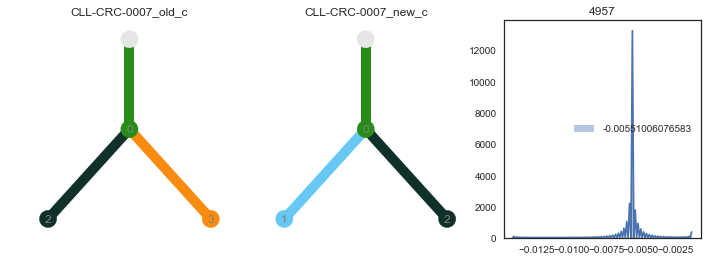

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0008	GR > Parent pval


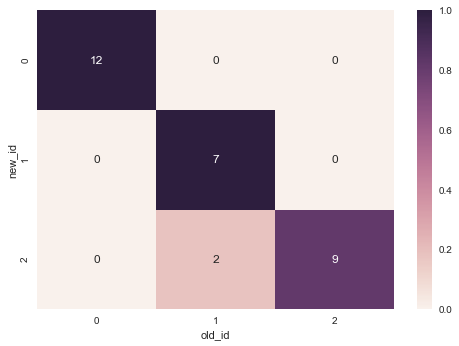

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0008	GR > Parent pval


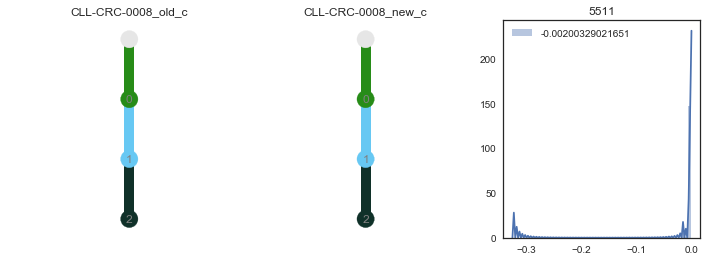

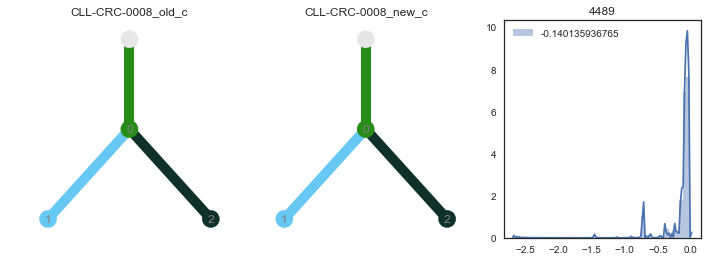

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0009	GR > Parent pval


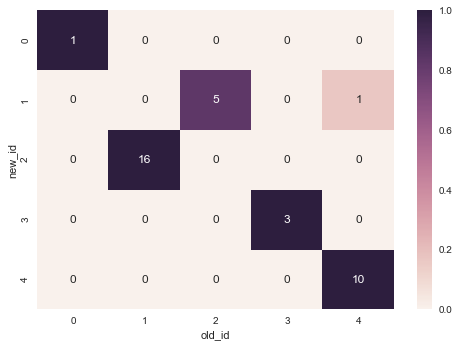

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0009	GR > Parent pval


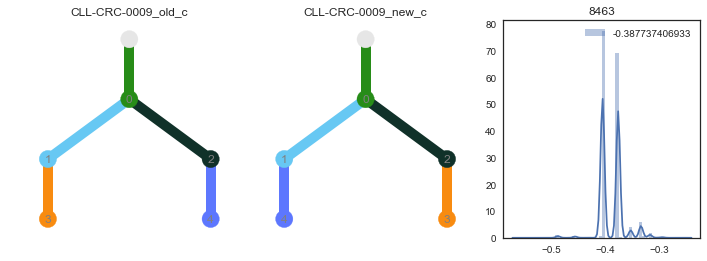

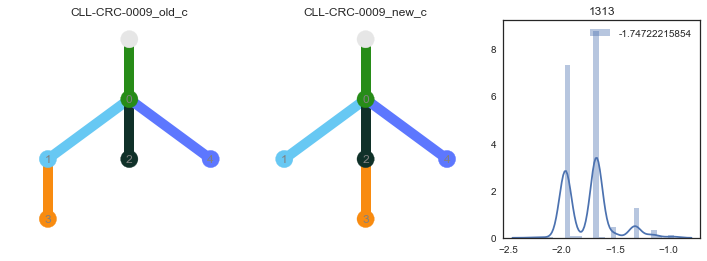

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0010	GR > Parent pval


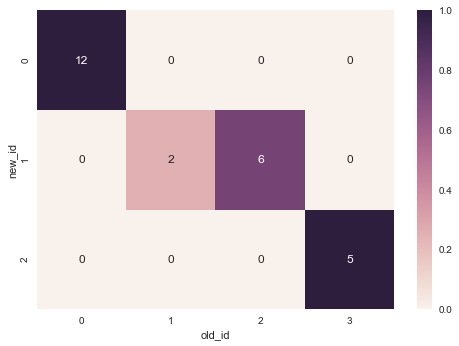

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0010	GR > Parent pval


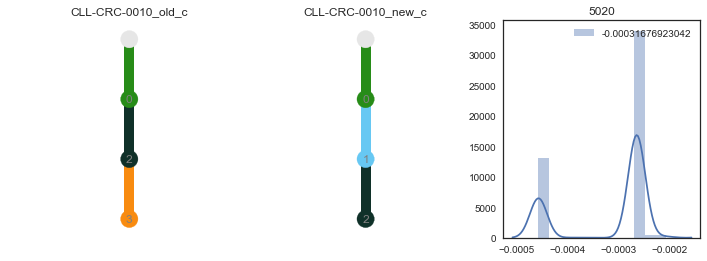

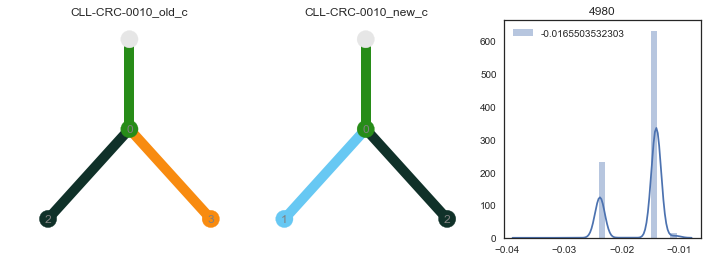

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0011	GR > Parent pval


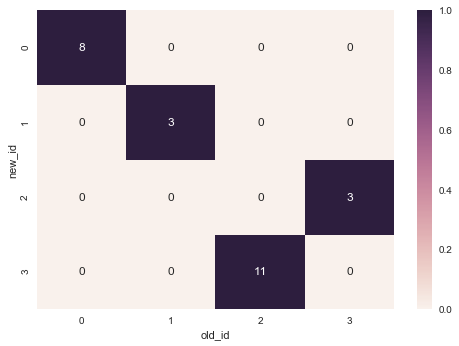

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0011	GR > Parent pval


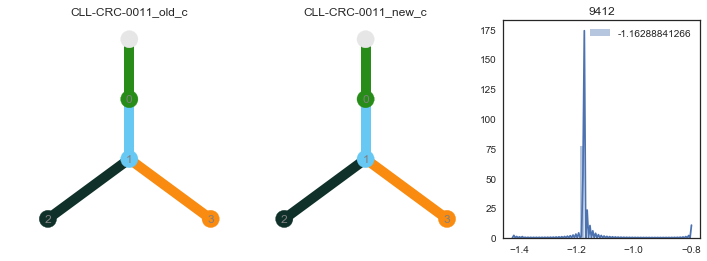

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0012	GR > Parent pval


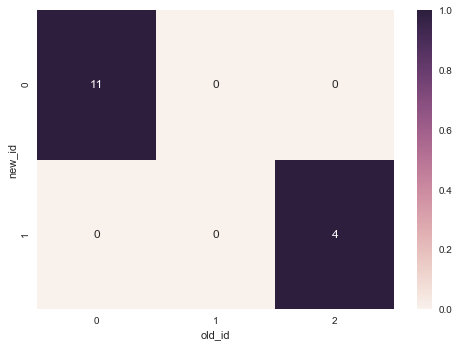

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0012	GR > Parent pval


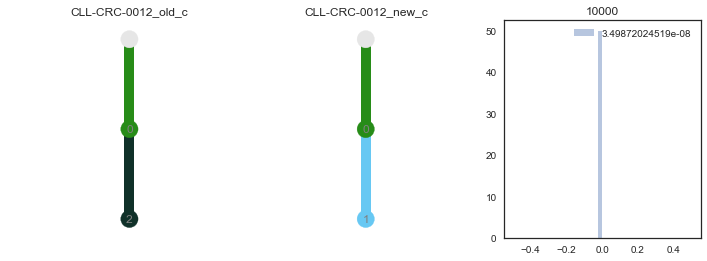

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0013	GR > Parent pval


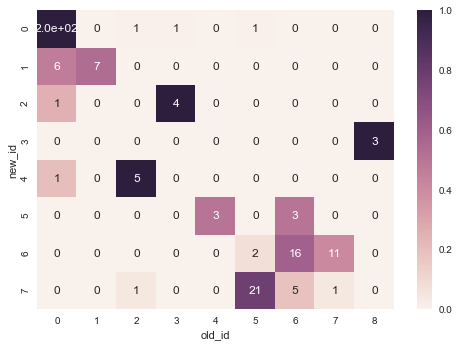

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0013	GR > Parent pval


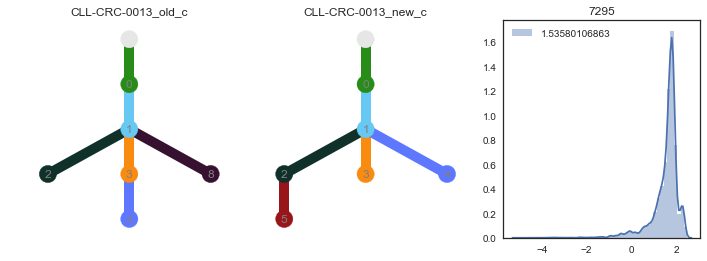

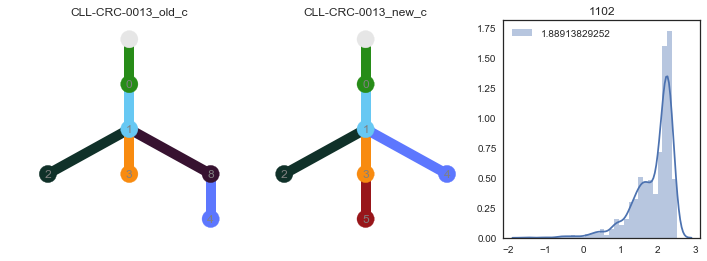

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0014	GR > Parent pval


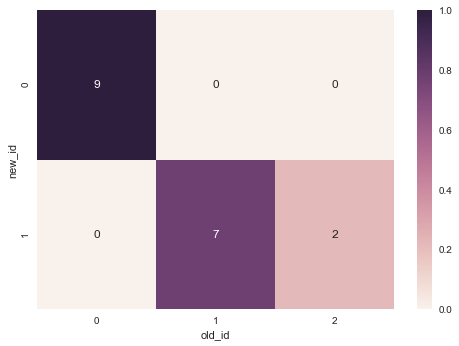

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0014	GR > Parent pval


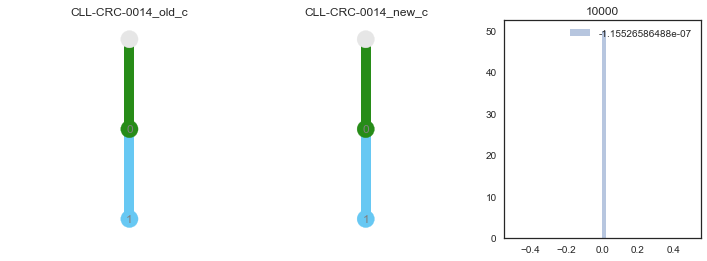

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0016	GR > Parent pval


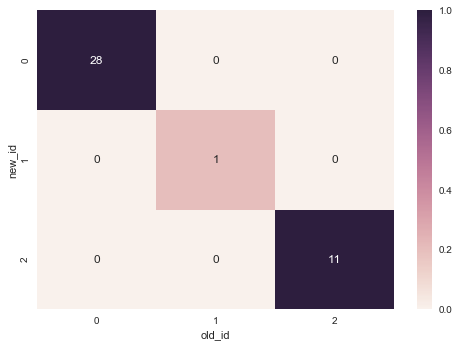

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0016	GR > Parent pval


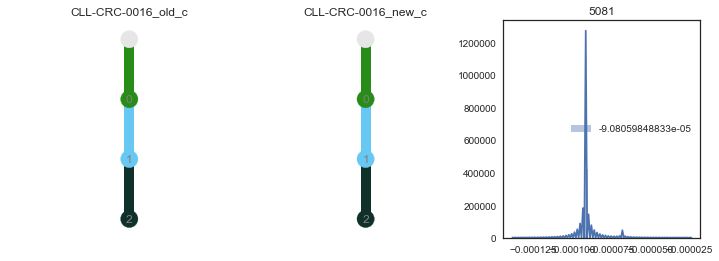

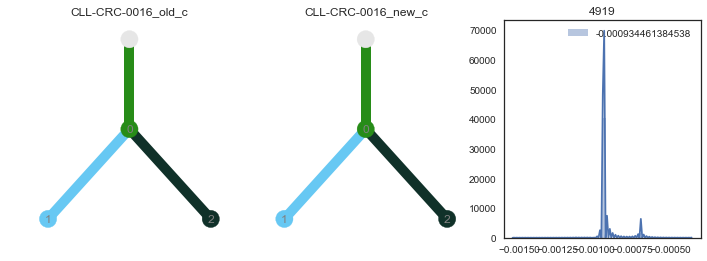

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0017	GR > Parent pval


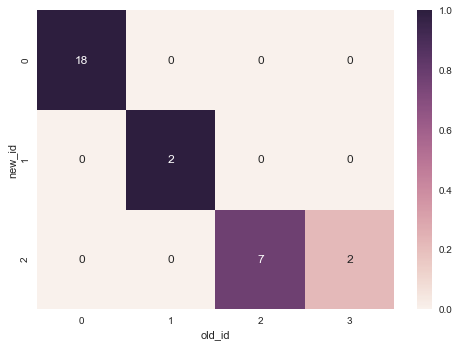

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0017	GR > Parent pval


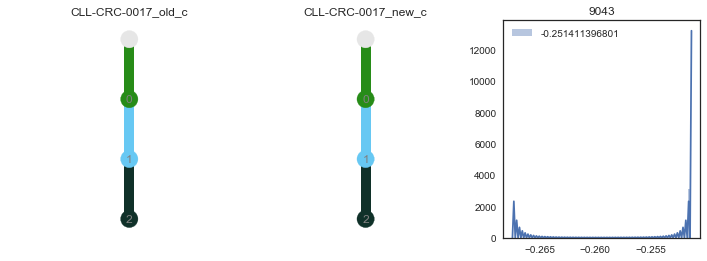

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0018	GR > Parent pval


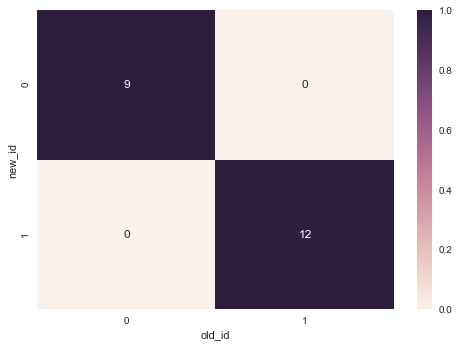

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0018	GR > Parent pval


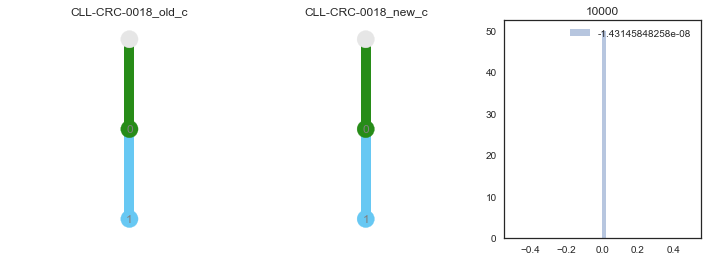

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0019	GR > Parent pval


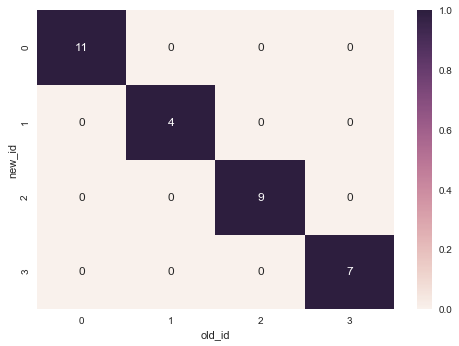

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0019	GR > Parent pval


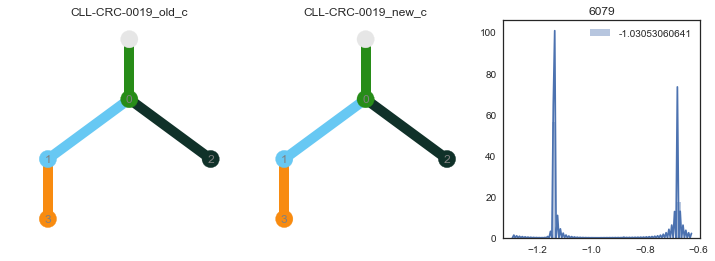

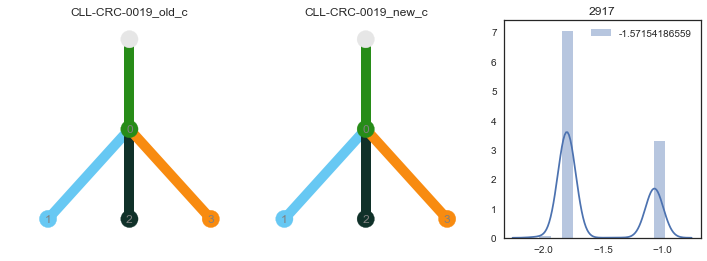

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0020	GR > Parent pval


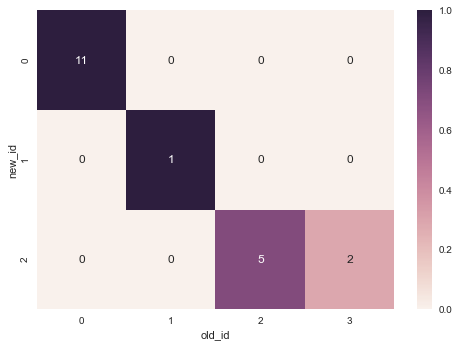

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0020	GR > Parent pval


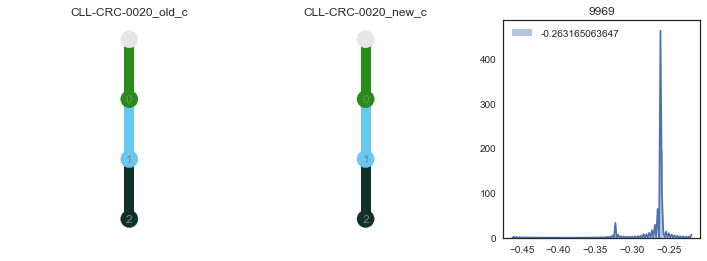

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0021	GR > Parent pval


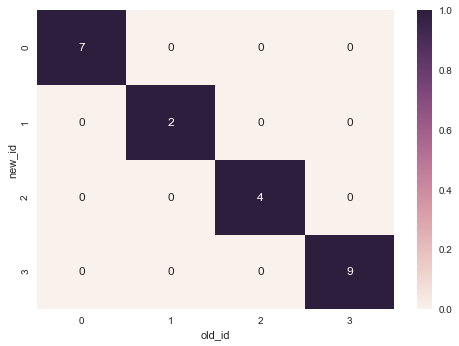

/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-0021	GR > Parent pval


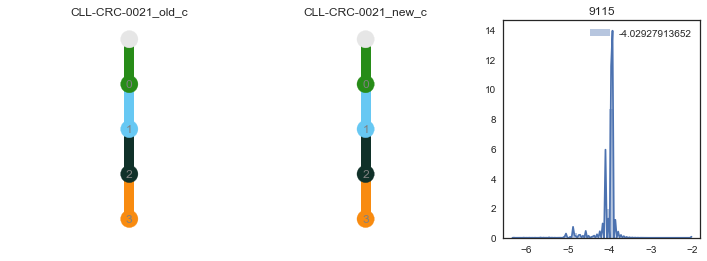

1186749

In [115]:
out_tsv=open("CLL-Kipps-p_vals_Mar16_2018_f.tsv","w")
out_tsv.write("indiv\tclust\tnew_clust\told_gr\tGR_gr_Parent\tp_not_exp\n")
for pkl_fn in glob.glob("/Users/dlivitz/ipythonNB/kipps_run_1/CLL-CRC-*.*pkl"):
    clusters={}
    indiv=pkl_fn.split(".")[0].split("/")[-1]
    new_membership={}
    if "WGS" in pkl_fn:
        with open("/Users/dlivitz/Documents/Project-CLL_Michi/nd_res_v3/january_freeze_-9_2018_"+indiv+".WGS.cluster.maf") as maf:
            maf.readline()
            for line in maf:
                spl=line.strip("\n").split("\t")
                if spl[14] not in clusters:clusters[spl[14]]=set()
                clusters[spl[14]].add(spl[0])

    else:
        with open("/Users/dlivitz/Documents/Project-CLL_Michi/nd_res_v3/january_freeze_-9_2018_"+indiv+".cluster.maf") as maf:
            maf.readline()
            for line in maf:
                spl=line.strip("\n").split("\t")
                if spl[14] not in clusters:clusters[spl[14]]=set()
                clusters[spl[14]].add(spl[0])
                
    #
    print pkl_fn.split(".pkl")[0] + "\t" +"GR > Parent pval" 

    plt.figure()
    overlap_map=np.zeros([len(clusters),len(old_map[str(int(indiv.split("-")[2]))].items())])
    overlap_map_len=np.zeros([len(clusters),len(old_map[str(int(indiv.split("-")[2]))].items())])
    for c_idx,cluster in clusters.items():
        for o_c_idx,o_cluster in old_map[str(int(indiv.split("-")[2]))].items():
            try:
                overlap_map[int(c_idx)-1,int(o_c_idx)-1]=len(cluster.intersection(o_cluster))/float(len(cluster))
                overlap_map_len[int(c_idx)-1,int(o_c_idx)-1]=len(cluster.intersection(o_cluster))

            except:
                continue
    sns.heatmap(overlap_map,annot=overlap_map_len)
    if "WGS" in pkl_fn: 
        d={"A":"A"}
    else:
        d={str(i_row):str(np.argmax(row)) for i_row,row in enumerate(overlap_map)}
    pattern = re.compile('|'.join(d.keys()))
    

    
    plt.xlabel("old_id")
    plt.ylabel("new_id")
    plt.show()
    with open(pkl_fn) as pkl:
        c_log,trees_by_edge,cluster_rates,cluster_rates_diff,cluster_line_fit_min_lik= cPickle.load(pkl)
    print pkl_fn.split(".pkl")[0] + "\t" +"GR > Parent pval" 
    clusters={}

    for cluster_idx,cluster in cluster_rates_diff.items():
        clusters[cluster_idx]=[np.nansum(np.array(cluster)[5000:]<0)/len(np.array(cluster)[5000:])]
        #print str(cluster_idx)+"\t%1.3f" % (np.nansum(np.array(cluster)[5000:]<0)/len(np.array(cluster)[5000:])) 
    #print pkl_fn.split(".pkl")[0] + "\t" +"log/exp pval" 
    for cluster_idx,cluster in cluster_line_fit_min_lik.items():
        #print str(cluster_idx)+"\t%1.3f" % (np.nansum(np.array(cluster)[5000:]>0.05)/len(np.array(cluster)[5000:])) 
        clusters[cluster_idx].append(np.nansum(np.array(cluster)[5000:]>0.05)/len(np.array(cluster)[5000:]))

    for cluster,values in clusters.items():
        out_tsv.write("\t".join([indiv,str(d.get(str(cluster_idx),str(cluster_idx))),str(cluster),str(old_gr.get(str(int(indiv.split("-")[2]))+"_"+str(cluster))),str(values[0]),str(values[1])])+"\n")
    
    for tree,dist in sorted(trees_by_edge.items(),key=lambda x:-len(x[1])):

        if len(dist) < 1000:continue
        plt.figure(figsize=(12,4))

        plt.subplot(1,3,1)
        plot_nx([[None,0]]+list(eval(pattern.sub(lambda x: d[x.group()], str(list(tree))))),"dot")
        plt.title(indiv+"_old_c")
        plt.subplot(1,3,2)
        plot_nx([[None,0]]+list(tree),"dot")
        plt.title(indiv+"_new_c")
        plt.subplot(1,3,3)
        sns.distplot(dist[100:],label=str(np.nanmean(dist[100:])))
        plt.legend()
        plt.title(len(dist))
        
        
        plt.show()
gc.collect()


In [59]:
overlap_map=np.zeros([len(clusters),len(old_map[str(int(indiv.split("-")[2]))].items())])
for c_idx,cluster in clusters.items():
    for o_c_idx,o_cluster in old_map[str(int(indiv.split("-")[2]))].items():
        try:
            overlap_map[int(c_idx)-1,int(o_c_idx)-1]=len(cluster.intersection(o_cluster))/float(len(cluster))
        except:
            continue
#clusters

In [81]:
values

{'ARHGEF25',
 'ASXL2',
 'ATRNL1',
 'CALML5',
 'CTBP2',
 'DUOX1',
 'EDF1',
 'EMILIN3',
 'EML1',
 'ENHO',
 'EPB41L3',
 'EPHA6',
 'EVA1A',
 'FAM65C',
 'GPM6A',
 'HIST2H2BE',
 'ILF3',
 'LTB',
 'LTB4R2',
 'OR8B3',
 'PIBF1',
 'SCN2A',
 'SCN7A',
 'SLC4A2',
 'SLIT2',
 'TBCD',
 'TCL1A',
 'ZBTB3'}

In [54]:
wbc

[2.0944558521560577, 3.7754962354551678, 4.7529089664613275, 5.563312799452429]

In [45]:
import scipy.stats

import collections
import random
def shuffle(x):
    x = list(x)
    random.shuffle(x)
    return x
def _get_fixed_colors(subclone_key):
        #green, black, blue,purple,orange

    color_list= [[39,140,24],
                 [103,200,243],
                [16,49,41],
                 [248,139,16],  
                  [93,119,254],
                 [152,22,26],
                 [104,236,172],
                 [249,142,135],
                 [55,18,48],
                 [83,82,22],
                 [247,36,36],
                 [0,79,114],
                 [243,65,132],
                 [60,185,179],
                 [185,177,243],
                 [139,34,67],
                 [178,41,186],
                 [58,146,231],
                 [130,159,21],
                 [161,91,243],
                 [131,61,17],
                 [248,75,81],
                 [32,75,32],
                 [45,109,116],
                 [255,169,199],
                 [55,179,113],
                 [34,42,3],
                 [56,121,166],
                 [172,60,15],
                 [115,76,204],
                 [21,61,73],
                 [67,21,74],#Additional colors, uglier and bad
                 [123,88,112],
                 [87,106,46],
                 [37,66,58],
                 [132,79,62],
                 [71,58,32],
                 [59,104,114],
                 [46,107,90],
                 [84,68,73],
                 [90,97,124],
                 [121,66,76],
                 [104,93,48],
                 [49,67,82],
                 [71,95,65],
                 [127,85,44]]

    return color_list[subclone_key]

tableau40 = _get_fixed_colors(slice(None,None,None))

# Scale the RGB values to the [0, 1] range,which is the format matplotlib accepts.
for i in range(len(tableau40)):
    r, g, b = tableau40[i]
    tableau40[i] = (r / 255., g / 255., b / 255.)
colors=tableau40
import sys
sys.path.append("/Users/dlivitz/PycharmProjects/NDphylogic_0.2.2/")
sys.path.append("/Users/dlivitz/PycharmProjects/NDphylogic_0.2.2/phylogicmod/")
#import phylogicmod.data
import cPickle


from mpl_toolkits.axes_grid.inset_locator import inset_axes

def line_fit_err(x):
        slope,intercept=x

        y_domain=[np.log(grid*wbc[tp_idx]+1e-40) for tp_idx in range(len_pre_tp)] #[np.log((grid-transformation[tp_idx])*wbc[tp_idx]+1e-40) for tp_idx in range(len_pre_tp)]
        y_weights=[adj_dens[tp_idx][c_idx] for tp_idx in range(len_pre_tp)]
        

        line_y_vals=slope*fb_x_vals+intercept

        selected_weight=[
            min(
                sum(y_weights[tp_idx][:min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100)+1]),
                sum(y_weights[tp_idx][min(bisect.bisect(y_domain[tp_idx],line_y_vals[tp_idx]),100):])
            )
            for tp_idx in range(len_pre_tp)]

        return -sum(selected_weight)



def plot_nx(edges,prog="neato",tableau40=tableau40):
    
    edges=[edge for edge in edges if None in edge or sum(np.isnan(edge))==0]

    #assign=results["assign"]-1
    edge_labels={}
    labels={}
    width={}
    DG=nx.DiGraph()
    for parent,clust in edges:
        #if parent == None: continue #print "aghhh"
        #labels[clust]=str(clust) if clust is not None else "MRCA"
        #labels[parent]=str(parent) if parent is not None else "MRCA"

        plot_parent=parent if parent != None else 10000000
        #edge_len=str(max(10,sum(results["assign"] == clust+1)))
        DG.add_edge(parent,clust) #,len=edge_len,minlen=edge_len)
        width[tuple([parent,clust])]=10 #np.random.random()*2+1
        edge_labels[tuple([parent,clust])]="" #label[clust]
    lables=dict([[x,str(x)] if x is not None else [None,""] for x in DG.nodes() ])
    #sizes=sum(results["assign"]==x) for x in 
    #pos=nx.spring_layout(DG)
    pos=pydot_layout(DG,prog=prog,root="1",overlap="false",splines="true",start=np.random.randint(1,100000)) #nx.nx_pydot.graphviz_layout(DG,prog='dot')
    
    color_list=[]
    for node in DG.nodes():
        if node == None: 
            color_list.append([0.9,0.9,0.9])
            continue
            
        if len(DG.successors(node)) > 0 or DG.predecessors(node)[0] == None:

            intelligent_color=tableau40[node] 
        else:
            try:
                neighbors= DG.successors(DG.predecessors(node)[0])
            except:
                neighbors= []
            intelligent_color=tableau40[node] 
            #if len(neighbors) > 0:

            #    intelligent_color=[min([1,0.5*phylo_cmap.colors[DG.predecessors(node)[0]][x] + 0.5*phylo_cmap.colors[node][x]]) for x in range(3)]
            #else:
            #    intelligent_color=[min([1,0.5*phylo_cmap.colors[DG.predecessors(node)[0]][x] + 0.5]) for x in range(3)]

        color_list.append(intelligent_color)
    edge_color_list=[]
    for edge in DG.edges():
        node=edge[1]
        if node == None: 
            edge_color_list.append([0.9,0.9,0.9])
            continue
            
        if len(DG.successors(node)) > 0 or DG.predecessors(node)[0] == None:

            intelligent_color=tableau40[node] 
        else:
            try:
                neighbors= DG.successors(DG.predecessors(node)[0])
            except:
                neighbors= []
                
            intelligent_color=tableau40[node] 

        edge_color_list.append(intelligent_color)
    
    
    nx.draw(DG,pos,arrows=False,labels=lables,font_color='gray',edge_label=[edge_labels[x] for x in DG.edges()],width=[10 for x in DG.edges()],cmap=phylo_cmap,node_color=color_list,edge_color=edge_color_list)
    nx.draw_networkx_edge_labels(DG,pos=pos,edge_labels=edge_labels,rotate=False)
    #nx.draw_networkx_edges(DG,pos,arrows=False)
    #nx.draw_graphviz(DG,"neato")
    return DG


import networkx as nx

from networkx.utils import open_file, make_str
def pydot_layout(G,prog='neato',root=None, **kwds):

    import pydotplus
    P=to_pydot(G)
    if root is not None :
        P.set("root",make_str(root))

    for arg in kwds.iteritems():        
        P.set(arg[0],arg[1])

    D=P.create_dot(prog=prog)
    #print D

    if D=="":  # no data returned
        print("Graphviz layout with %s failed"%(prog))
        print()
        print("To debug what happened try:")
        print("P=pydot_from_networkx(G)")
        print("P.write_dot(\"file.dot\")")
        print("And then run %s on file.dot"%(prog))
        return

    Q=pydotplus.graph_from_dot_data(D)

    node_pos={}
    for n in G.nodes():
        pydot_node = pydotplus.Node(make_str(n)).get_name()
        node=Q.get_node(pydot_node)

        if isinstance(node,list):
            node=node[0]
        pos=node.get_pos()[1:-1] # strip leading and trailing double quotes
        if pos != None:
            xx,yy=pos.split(",")
            node_pos[n]=(float(xx),float(yy))
    return node_pos



def to_pydot(N, strict=True):
    """Return a pydot graph from a NetworkX graph N.

    Parameters
    ----------
    N : NetworkX graph
      A graph created with NetworkX

    Examples
    --------
    >>> K5 = nx.complete_graph(5)
    >>> P = nx.nx_pydot.to_pydot(K5)

    Notes
    -----

    """
    import pydotplus
    # set Graphviz graph type
    if N.is_directed():
        graph_type='digraph'
    else:
        graph_type='graph'
    strict=N.number_of_selfloops()==0 and not N.is_multigraph()

    name = N.name
    graph_defaults=N.graph.get('graph',{})
    if name is '':
        P = pydotplus.Dot('', graph_type=graph_type, strict=strict,
                      **graph_defaults)
    else:
        P = pydotplus.Dot('"%s"'%name, graph_type=graph_type, strict=strict,
                      **graph_defaults)
    try:
        P.set_node_defaults(**N.graph['node'])
    except KeyError:
        pass
    try:
        P.set_edge_defaults(**N.graph['edge'])
    except KeyError:
        pass

    for n,nodedata in N.nodes_iter(data=True):
        str_nodedata=dict((k,make_str(v)) for k,v in nodedata.items())
        p=pydotplus.Node(make_str(n),**str_nodedata)
        P.add_node(p)

    if N.is_multigraph():
        for u,v,key,edgedata in N.edges_iter(data=True,keys=True):
            str_edgedata=dict((k,make_str(v)) for k,v in edgedata.items())
            edge=pydotplus.Edge(make_str(u), make_str(v),
                    key=make_str(key), **str_edgedata)
            P.add_edge(edge)

    else:
        for u,v,edgedata in N.edges_iter(data=True):
            str_edgedata=dict((k,make_str(v)) for k,v in edgedata.items())
            edge=pydotplus.Edge(make_str(u),make_str(v),**str_edgedata)
            P.add_edge(edge)
    return P


from matplotlib import colors as mcolors

phylo_cmap=mcolors.ListedColormap(tableau40)
import collections
import random
def shuffle(x):
    x = list(x)
    random.shuffle(x)
    return x
def _get_fixed_colors(subclone_key):
        #green, black, blue,purple,orange

    color_list= [[39,140,24],
                 [103,200,243],
                [16,49,41],
                 [248,139,16],  
                  [93,119,254],
                 [152,22,26],
                 [104,236,172],
                 [249,142,135],
                 [55,18,48],
                 [83,82,22],
                 [247,36,36],
                 [0,79,114],
                 [243,65,132],
                 [60,185,179],
                 [185,177,243],
                 [139,34,67],
                 [178,41,186],
                 [58,146,231],
                 [130,159,21],
                 [161,91,243],
                 [131,61,17],
                 [248,75,81],
                 [32,75,32],
                 [45,109,116],
                 [255,169,199],
                 [55,179,113],
                 [34,42,3],
                 [56,121,166],
                 [172,60,15],
                 [115,76,204],
                 [21,61,73],
                 [67,21,74],#Additional colors, uglier and bad
                 [123,88,112],
                 [87,106,46],
                 [37,66,58],
                 [132,79,62],
                 [71,58,32],
                 [59,104,114],
                 [46,107,90],
                 [84,68,73],
                 [90,97,124],
                 [121,66,76],
                 [104,93,48],
                 [49,67,82],
                 [71,95,65],
                 [127,85,44]]

    return color_list[subclone_key]

tableau40 = _get_fixed_colors(slice(None,None,None))

# Scale the RGB values to the [0, 1] range,which is the format matplotlib accepts.
for i in range(len(tableau40)):
    r, g, b = tableau40[i]
    tableau40[i] = (r / 255., g / 255., b / 255.)
colors=tableau40
import sys
sys.path.append("/Users/dlivitz/PycharmProjects/NDphylogic_0.2.2/")
sys.path.append("/Users/dlivitz/PycharmProjects/NDphylogic_0.2.2/phylogicmod/")
#import phylogicmod.data
import cPickle


In [11]:
for cluster in cluster_line_fit_min_lik:
    cluster_line_fit_min_lik

{0: [0.076196804277130825,
  0.084257242227202878,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.099680948887373333,
  0.099680948887373333,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.099680948887373333,
  0.099680948887373333,
  0.099680948887373333,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.099680948887373333,
  0.099680948887373333,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.076196808137964145,
  0.084257242227202878,
  0.076196806590959398,
  0.076196808137964256,
  0.099680948887373555,
  0.076196808137964256,
  0.076196808137964256,
  0.076196808

In [107]:
old_gr

{'1': {'1': 0.734, '2': 0.119, '3': 0.523, '4': 0.0, '5': 0.633},
 '10': {'1': 0.293, '2': 0.868},
 '12': {'1': 0.471, '2': 0.075},
 '13': {'1': 0.612, '2': 0.025, '3': 0.629, '5': 0.814},
 '14': {'1': 0.0},
 '17': {'1': 0.846, '3': 0.929},
 '2': {'1': 0.874},
 '20': {'1': 0.479},
 '21': {'1': 0.115},
 '3': {'1': 0.041, '2': 0.152},
 '5': {'1': 0.973, '2': 0.772, '3': 0.0, '4': 0.0, '5': 0.0},
 '6': {'1': 0.785, '2': 0.758, '4': 0.014},
 '7': {'1': 0.0, '2': 0.993, '3': 0.006},
 '8': {'1': 0.084, '2': 0.427},
 '9': {'1': 0.001, '2': 1.0, '3': 0.701, '4': 0.045}}

In [24]:
test_dens=cPickle.load(open("/Users/dlivitz/Downloads/MGHCC0001.no_debug.pkl"))

In [25]:
s=test_dens.sample_list

In [33]:
for sample in s:
    m= sample.get_mut_by_varstr("6:152419926:A:G")
    print m.local_cn_a1,m.local_cn_a2
    

1.0 1.0
1.0 1.0
1.0 1.0
